# First Approach

# Fourth Btngan


Running Single Robot Case Study

Running Test Case: Single Robot Case Study
Robot 1: Best Objective: 19.69
Robot 1: Best Path: [(0, 0), (0, 1), (0, 2), (1, 3), (1, 3), (1, 3), (1, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (1, 3), (1, 3), (0, 3), (0, 3), (0, 3), (0, 3), (-1, 4), (-1, 4), (-1, 4), (-1, 4), (-1, 4), (-1, 4), (-1, 5), (-1, 5), (-1, 5), (-1, 5), (-2, 6), (-3, 7), (-3, 7), (-3, 7), (-3, 7), (-4, 7), (-5, 6), (-6, 6), (-6, 6), (-6, 6), (-6, 6), (-6, 6), (-6, 6), (-7, 6), (-7, 6), (-7, 6), (-7, 6), (-6, 5), (-6, 5), (-6, 5), (-6, 5), (-5, 5), (-5, 5)]


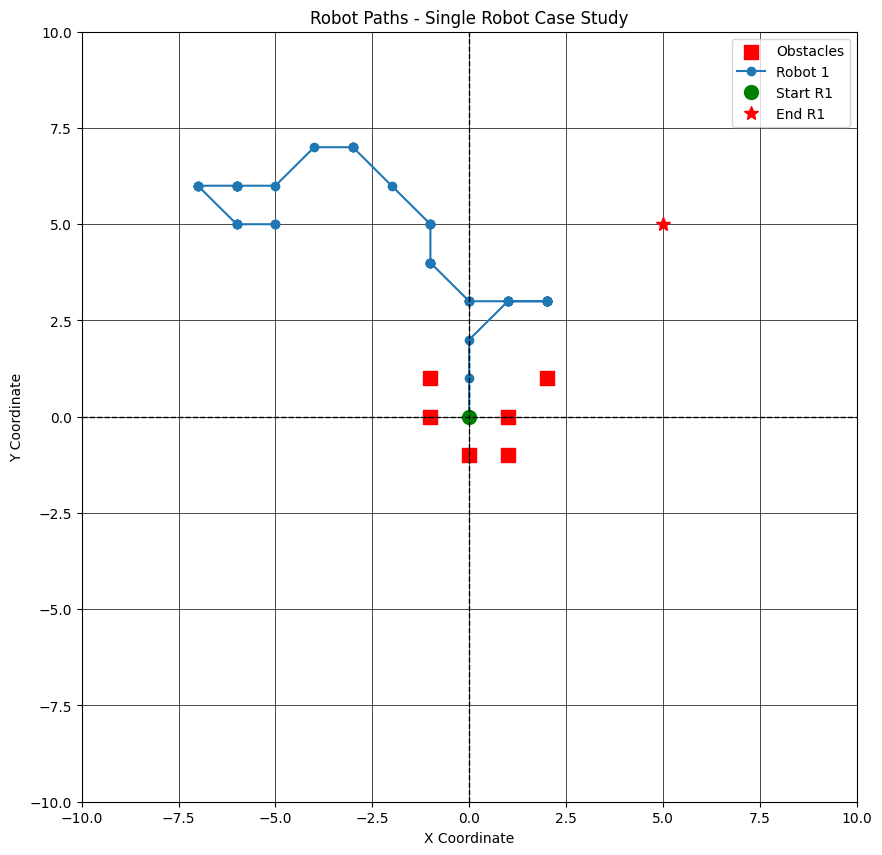

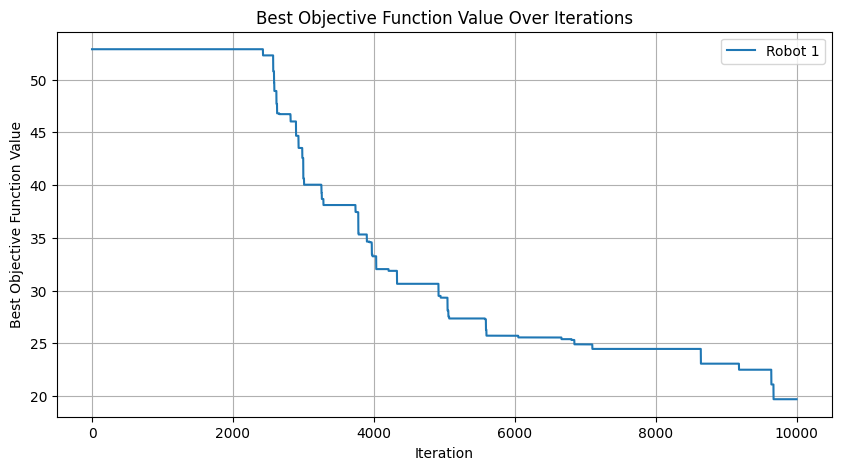


Running Three Robots Case Study

Running Test Case: Three Robots Case Study
Robot 1: Best Objective: 30.12
Robot 1: Best Path: [(0, 0), (0, 0), (0, 1), (0, 2), (-1, 3), (-3, 4), (-3, 4), (-3, 4), (-3, 4), (-3, 4), (-3, 4), (-3, 4), (-3, 4), (-2, 5), (-1, 6), (-1, 6), (-2, 7), (-2, 7), (-2, 7), (-2, 7), (-4, 8), (-5, 9), (-5, 9), (-5, 9), (-5, 9), (-5, 9), (-5, 9), (-7, 8), (-7, 8), (-7, 8), (-7, 8), (-7, 8), (-7, 8), (-7, 8), (-7, 8), (-9, 7), (-9, 7), (-9, 7), (-9, 7), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 9), (-9, 9), (-9, 9), (-9, 9), (-9, 9), (-9, 9), (-8, 9), (-8, 9), (-8, 9), (-8, 9), (-8, 9), (-8, 9), (-8, 9), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-9, 8), (-8, 8), (-8, 8), (-8, 8), (-8, 8), (-8, 8), (-8, 8), (-9, 9), (-9, 9), (-9, 9), (-9, 9), (-8, 7), (-8, 7), (-8, 7), (-8, 7), (-8, 6), (-8, 6), (-8, 6), (-8, 6), (-8, 6), (-8, 6), (-8, 6)]
Robot 2: Best Objective: 9.79

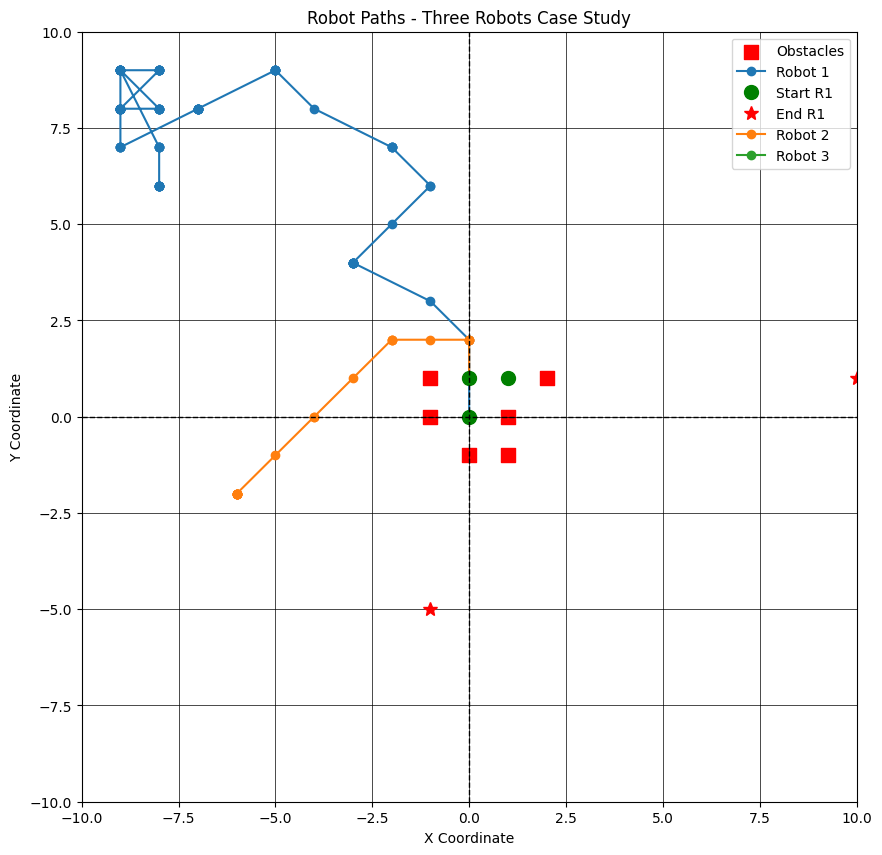

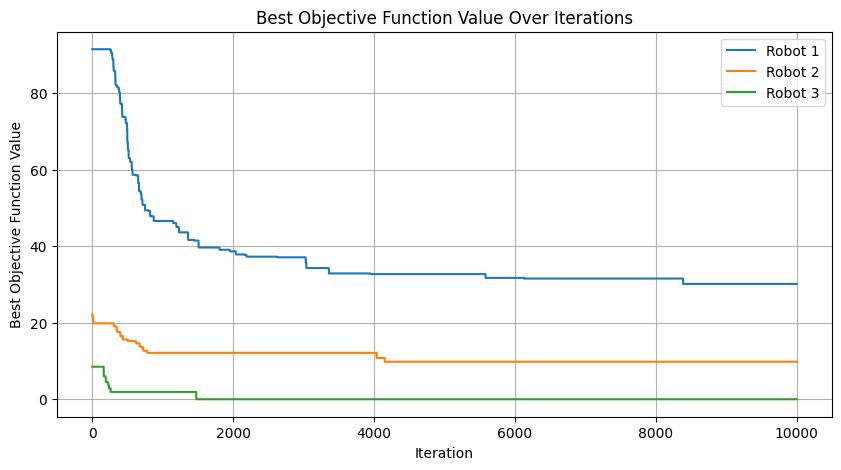


Performing parameter analysis...

Parameter Analysis Results:
Parameters (temp, temp_min, beta): (500, 0.1, 0.0005)
  Best Objective: 16.77
  Convergence Rate (iterations): 19997
  Total Improvement: 53.50

Parameters (temp, temp_min, beta): (500, 0.1, 0.001)
  Best Objective: 21.07
  Convergence Rate (iterations): 9998
  Total Improvement: 34.45

Parameters (temp, temp_min, beta): (500, 0.1, 0.002)
  Best Objective: 14.11
  Convergence Rate (iterations): 5000
  Total Improvement: 20.02

Parameters (temp, temp_min, beta): (500, 1, 0.0005)
  Best Objective: 32.42
  Convergence Rate (iterations): 1997
  Total Improvement: 0.00

Parameters (temp, temp_min, beta): (500, 1, 0.001)
  Best Objective: 92.33
  Convergence Rate (iterations): 999
  Total Improvement: 0.00

Parameters (temp, temp_min, beta): (500, 1, 0.002)
  Best Objective: 22.56
  Convergence Rate (iterations): 500
  Total Improvement: 0.00

Parameters (temp, temp_min, beta): (500, 10, 0.0005)
  Best Objective: 74.32
  Converge

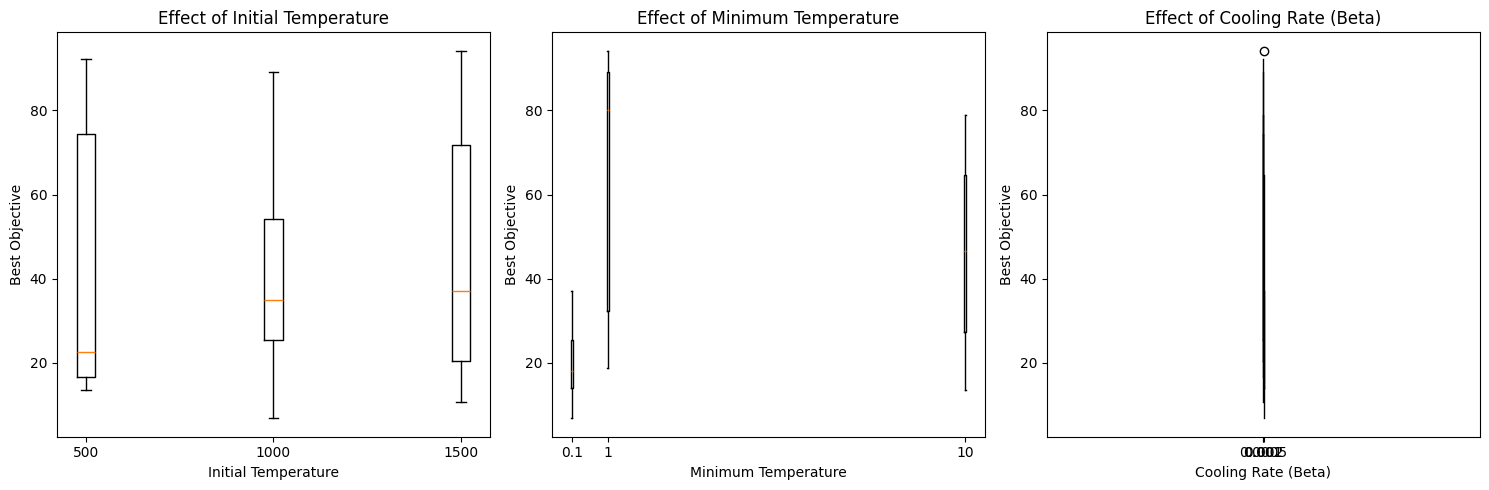

In [ ]:
import random
import math
import matplotlib.pyplot as plt

class Robot:
    """
    Represents a robot with path planning capabilities.

    Attributes:
        id (int): Unique identifier for the robot.
        path (list): List of (x, y) coordinates representing the robot's path.
        smoothing_index (float): Measure of path smoothness.
        start_point (tuple): Starting (x, y) coordinates.
        end_point (tuple): Goal (x, y) coordinates.
    """

    def __init__(self, robot_id, start_point, end_point):
        """
        Initialize a Robot instance.

        Args:
            robot_id (int): Unique identifier for the robot.
            start_point (tuple): Starting (x, y) coordinates.
            end_point (tuple): Goal (x, y) coordinates.
        """
        self.id = robot_id
        self.path = []
        self.smoothing_index = 0.0
        self.start_point = start_point
        self.end_point = end_point

    def init_num_points_per_robot(self, grid_size):
        """
        Initialize the number of points for the robot's path.

        Args:
            grid_size (int): Size of the grid environment.

        Returns:
            int: Number of points for the robot's path.
        """
        min_distance = self.calculate_distance(self.start_point, self.end_point)
        min_points = math.ceil(min_distance)
        max_points = grid_size * grid_size
        return random.randint(min_points, max_points)

    def generate_random_path(self, num_points_per_robot, robot_step_size, grid_size=None, obstacles=None):
        """
        Generate a random path for the robot.

        Args:
            num_points_per_robot (int): Number of points in the path.
            robot_step_size (int): Maximum step size for the robot.
            grid_size (int, optional): Size of the grid environment.
            obstacles (set, optional): Set of obstacle coordinates.
        """
        self.path = [self.start_point, (0, 0)]
        for _ in range(1, num_points_per_robot - 1):
            x, y = self.path[-1]
            while True:
                new_point = (x + random.randint(-robot_step_size, robot_step_size),
                             y + random.randint(-robot_step_size, robot_step_size))
                if grid_size:
                    new_point = (
                        max(-grid_size, min(grid_size, new_point[0])),
                        max(-grid_size, min(grid_size, new_point[1]))
                    )
                if not (obstacles and new_point in obstacles):
                    break
            self.path.append(new_point)
            if new_point == self.end_point:
                break
        self.calculate_smoothing_index()

    def calculate_distance(self, point1, point2):
        """
        Calculate Euclidean distance between two points.

        Args:
            point1 (tuple): (x, y) coordinates of first point.
            point2 (tuple): (x, y) coordinates of second point.

        Returns:
            float: Euclidean distance between the points.
        """
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

    def calculate_smoothing_index(self):
        """Calculate the smoothing index of the current path."""
        if len(self.path) < 2:
            self.smoothing_index = 0.0
            return
        distances = [self.calculate_distance(self.path[i], self.path[i + 1]) for i in range(len(self.path) - 1)]
        robot_step_size = max(distances) if distances else 0
        if robot_step_size == 0:
            self.smoothing_index = 0.0
            return
        self.smoothing_index = math.sqrt(sum((dist - robot_step_size) ** 2 for dist in distances) / len(distances))

    def calculate_total_objective(self, robot_step_size):
        """
        Calculate the total objective value of the current path.

        Args:
            robot_step_size (int): Maximum step size for the robot.

        Returns:
            float: Total objective value combining path distance and smoothness.
        """
        total_distance = sum(self.calculate_distance(self.path[i - 1], self.path[i]) for i in range(1, len(self.path)))
        return total_distance + self.smoothing_index

def simulated_annealing(robot, robot_step_size, temp, temp_min, beta, grid_size=5, obstacles=None):
    """
    Perform simulated annealing to optimize the robot's path, ensuring obstacle avoidance.

    Args:
        robot (Robot): Robot instance to optimize path for.
        robot_step_size (int): Maximum step size for the robot.
        temp (float): Initial temperature for SA.
        temp_min (float): Minimum temperature to stop SA.
        beta (float): Cooling rate for geometric cooling schedule.
        grid_size (int, optional): Size of the grid environment.
        obstacles (set, optional): Set of obstacle coordinates.

    Returns:
        tuple: Best objective value, list of objectives over time, and best path.
    """
    num_points_per_robot = robot.init_num_points_per_robot(grid_size)
    robot.generate_random_path(num_points_per_robot, robot_step_size, grid_size, obstacles)
    current_state = robot.path
    best_state = list(current_state)
    best_objective = robot.calculate_total_objective(robot_step_size)
    current_objective = best_objective
    objectives_over_time = []

    def is_valid_move(point):
        """Check if a move is valid (within grid and not an obstacle)."""
        return ((-grid_size <= point[0] <= grid_size) and
                (-grid_size <= point[1] <= grid_size) and
                (obstacles is None or point not in obstacles))

    while temp > temp_min:
        neighbor = list(current_state)
        random_index = random.randint(1, len(neighbor) - 1)

        # Try to find a valid new point
        for _ in range(10):  # Limit attempts to avoid infinite loop
            new_point = (
                neighbor[random_index][0] + random.randint(-1, 1),
                neighbor[random_index][1] + random.randint(-1, 1)
            )
            if is_valid_move(new_point):
                break
        else:
            continue  # If no valid point found, skip this iteration

        distance = robot.calculate_distance(current_state[random_index], new_point)
        if distance == 0 or distance > robot_step_size:
            continue

        # Check if the path to the new point crosses any obstacle
        prev_point = neighbor[random_index - 1]
        next_point = neighbor[random_index + 1] if random_index + 1 < len(neighbor) else neighbor[random_index]
        if obstacles:
            if any(intersects_obstacle(prev_point, new_point, obstacle) or
                   intersects_obstacle(new_point, next_point, obstacle)
                   for obstacle in obstacles):
                continue

        neighbor[random_index] = new_point
        robot.path = neighbor
        robot.calculate_smoothing_index()
        neighbor_objective = robot.calculate_total_objective(robot_step_size)

        delta = neighbor_objective - current_objective
        if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temp):
            current_state = list(neighbor)
            current_objective = neighbor_objective

        if current_objective < best_objective:
            best_state = list(current_state)
            best_objective = current_objective

        objectives_over_time.append(best_objective)
        temp = temp / (1 + beta * temp)

    robot.path = best_state
    return best_objective, objectives_over_time, best_state

def intersects_obstacle(p1, p2, obstacle):
    """Check if the line segment from p1 to p2 intersects with the obstacle."""
    # Implement line segment intersection check with obstacle
    # This is a simplified version, you might want to implement a more robust check
    return (min(p1[0], p2[0]) <= obstacle[0] <= max(p1[0], p2[0]) and
            min(p1[1], p2[1]) <= obstacle[1] <= max(p1[1], p2[1]))

def run_test_case(test_case, robots, robot_step_size, temp, temp_min, beta, expected_results=None, grid_size=5, obstacles=None):
    """
    Run a test case for the SA algorithm and visualize results, including obstacles.

    Args:
        test_case (str): Name of the test case.
        robots (list): List of Robot instances.
        robot_step_size (int): Maximum step size for the robots.
        temp (float): Initial temperature for SA.
        temp_min (float): Minimum temperature to stop SA.
        beta (float): Cooling rate for geometric cooling schedule.
        expected_results (dict, optional): Expected results for validation.
        grid_size (int, optional): Size of the grid environment.
        obstacles (set, optional): Set of obstacle coordinates.
    """
    print(f"\nRunning Test Case: {test_case}")
    plt.figure(figsize=(10, 10))
    random.seed()
    objectives_over_time_arr = []

    # Plot obstacles
    if obstacles:
        obstacle_x, obstacle_y = zip(*obstacles)
        plt.scatter(obstacle_x, obstacle_y, color='red', s=100, marker='s', label='Obstacles')

    for robot in robots:
        best_objective, objectives_over_time, best_path = simulated_annealing(
            robot, robot_step_size, temp, temp_min, beta, grid_size, obstacles
        )
        objectives_over_time_arr.append(objectives_over_time)
        print(f"Robot {robot.id}: Best Objective: {best_objective:.2f}")
        print(f"Robot {robot.id}: Best Path: {best_path}")
        x, y = zip(*robot.path)
        plt.plot(x, y, marker='o', label=f'Robot {robot.id}')

        # Mark start and end points
        plt.plot(robot.start_point[0], robot.start_point[1], 'go', markersize=10, label=f'Start R{robot.id}' if robot.id == 1 else '')
        plt.plot(robot.end_point[0], robot.end_point[1], 'r*', markersize=10, label=f'End R{robot.id}' if robot.id == 1 else '')

    plt.title(f'Robot Paths - {test_case}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axhline(0, color='black', linewidth=1, ls='--')
    plt.axvline(0, color='black', linewidth=1, ls='--')
    plt.xlim(-grid_size, grid_size)
    plt.ylim(-grid_size, grid_size)
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.legend()
    plt.show()

    # Plot objective function over time
    plt.figure(figsize=(10, 5))
    for i, objectives_over_time_ins in enumerate(objectives_over_time_arr):
        plt.plot(objectives_over_time_ins, label=f'Robot {robots[i].id}')
    plt.title('Best Objective Function Value Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Best Objective Function Value')
    plt.legend()
    plt.grid()
    plt.show()

# New function for parameter analysis
def analyze_performance(robot, robot_step_size, temp_range, temp_min_range, beta_range, grid_size, obstacles):
    """
    Analyze the algorithm's performance with different parameter combinations.

    Args:
        robot (Robot): Robot instance to optimize path for.
        robot_step_size (int): Maximum step size for the robot.
        temp_range (list): List of initial temperatures to test.
        temp_min_range (list): List of minimum temperatures to test.
        beta_range (list): List of cooling rates to test.
        grid_size (int): Size of the grid environment.
        obstacles (set): Set of obstacle coordinates.

    Returns:
        dict: Performance results for different parameter combinations.
    """
    results = {}
    for temp in temp_range:
        for temp_min in temp_min_range:
            for beta in beta_range:
                key = (temp, temp_min, beta)
                best_objective, objectives_over_time, _ = simulated_annealing(
                    robot, robot_step_size, temp, temp_min, beta, grid_size, obstacles
                )
                results[key] = {
                    'best_objective': best_objective,
                    'convergence_rate': len(objectives_over_time),
                    'final_improvement': objectives_over_time[0] - best_objective
                }
    return results

# Main execution
if __name__ == "__main__":
    obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1,-1)}
    grid_size = 10

    # Case Study 1: Single Robot
    robots_single = [Robot(1, (0,0), (5, 5))]
    test_case_single = {
        "name": "Single Robot Case Study",
        "robots": robots_single,
        "robot_step_size": 1,
        "temp": 1000,
        "temp_min": 0.1,
        "beta": 0.001,
        "obstacles": obstacles,
        "grid_size": grid_size
    }

    print("\nRunning Single Robot Case Study")
    run_test_case(
        test_case_single["name"], test_case_single["robots"],
        test_case_single["robot_step_size"], test_case_single["temp"],
        test_case_single["temp_min"], test_case_single["beta"],
        grid_size=test_case_single["grid_size"], obstacles=test_case_single["obstacles"]
    )

    # Case Study 2: Three Robots
    robots_multiple = [Robot(1, (0,0), (0, 1)), Robot(2, (0,1), (10, 1)), Robot(3, (1,1), (-1, -5))]
    test_case_multiple = {
        "name": "Three Robots Case Study",
        "robots": robots_multiple,
        "robot_step_size": 1,
        "temp": 1000,
        "temp_min": 0.01,
        "beta": 0.01,
        "obstacles": obstacles,
        "grid_size": grid_size
    }

    print("\nRunning Three Robots Case Study")
    run_test_case(
        test_case_multiple["name"], test_case_multiple["robots"],
        test_case_multiple["robot_step_size"], test_case_multiple["temp"],
        test_case_multiple["temp_min"], test_case_multiple["beta"],
        grid_size=test_case_multiple["grid_size"], obstacles=test_case_multiple["obstacles"]
    )

    # New Implementation: Parameter Analysis
    print("\nPerforming parameter analysis...")
    temp_range = [500, 1000, 1500]
    temp_min_range = [0.1, 1, 10]
    beta_range = [0.0005, 0.001, 0.002]

    analysis_results = analyze_performance(
        robots_single[0], test_case_single["robot_step_size"],
        temp_range, temp_min_range, beta_range,
        test_case_single["grid_size"], test_case_single["obstacles"]
    )

    # Print analysis results
    print("\nParameter Analysis Results:")
    for params, result in analysis_results.items():
        print(f"Parameters (temp, temp_min, beta): {params}")
        print(f"  Best Objective: {result['best_objective']:.2f}")
        print(f"  Convergence Rate (iterations): {result['convergence_rate']}")
        print(f"  Total Improvement: {result['final_improvement']:.2f}")
        print()

    # Visualize parameter effects
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.title("Effect of Initial Temperature")
    for temp in temp_range:
        objectives = [analysis_results[(temp, tm, b)]['best_objective'] for tm in temp_min_range for b in beta_range]
        plt.boxplot(objectives, positions=[temp], widths=50)
    plt.xlabel("Initial Temperature")
    plt.ylabel("Best Objective")

    plt.subplot(132)
    plt.title("Effect of Minimum Temperature")
    for temp_min in temp_min_range:
        objectives = [analysis_results[(t, temp_min, b)]['best_objective'] for t in temp_range for b in beta_range]
        plt.boxplot(objectives, positions=[temp_min], widths=0.05)
    plt.xlabel("Minimum Temperature")
    plt.ylabel("Best Objective")

    plt.subplot(133)
    plt.title("Effect of Cooling Rate (Beta)")
    for beta in beta_range:
        objectives = [analysis_results[(t, tm, beta)]['best_objective'] for t in temp_range for tm in temp_min_range]
        plt.boxplot(objectives, positions=[beta], widths=0.0001)
    plt.xlabel("Cooling Rate (Beta)")
    plt.ylabel("Best Objective")

    plt.tight_layout()
    plt.show()


Testing Robot 1: (0, 0) → (5, 5)

Analytics for Robot 1:
Path Length: 2.41
Number of Segments: 7
Average Segment Length: 0.34
Path Smoothness Index: 1.21
Best Fitness Score: 3.62
Convergence Generation: 1

Testing Robot 2: (-3, -3) → (3, 3)

Analytics for Robot 2:
Path Length: 8.49
Number of Segments: 4
Average Segment Length: 2.12
Path Smoothness Index: 1.00
Best Fitness Score: 9.49
Convergence Generation: 1

Testing Robot 3: (3, 3) → (-3, -3)

Analytics for Robot 3:
Path Length: 8.49
Number of Segments: 4
Average Segment Length: 2.12
Path Smoothness Index: 1.00
Best Fitness Score: 9.49
Convergence Generation: 1


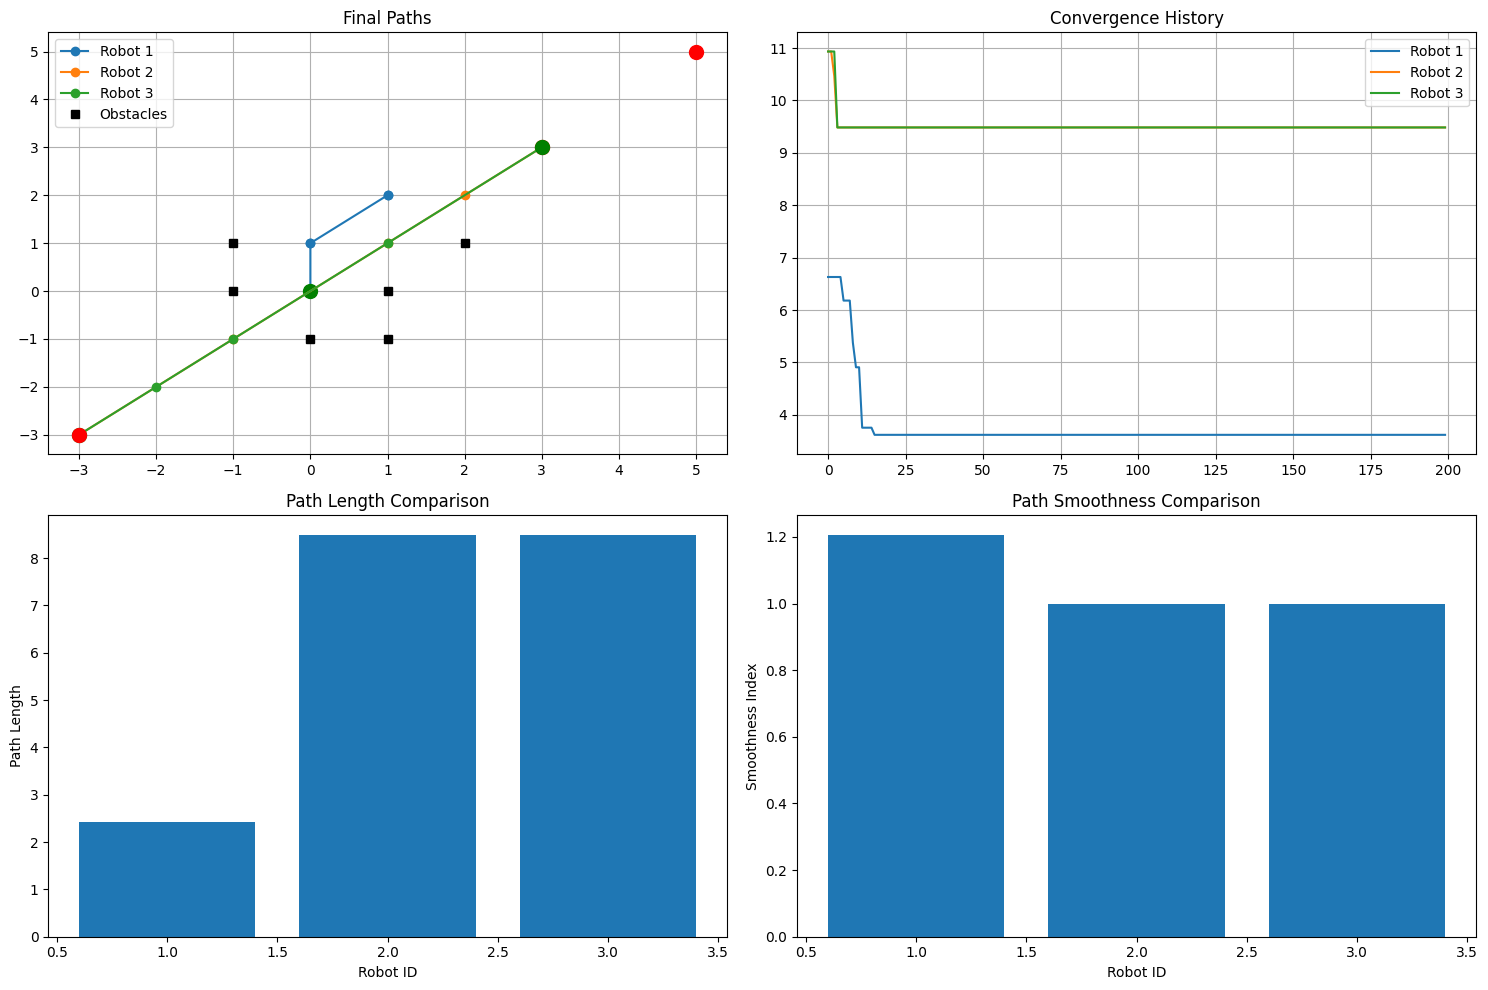


Overall Statistics:
Average Path Length: 6.46
Average Smoothness: 1.07
Average Convergence Generation: 1.00
Best Performing Robot: 1


In [ ]:
import random
import numpy as np
from copy import deepcopy

class GA(Robot):
    def __init__(self, robot_id, start_point, end_point, elite_size=2,
                 population_size=50, crossover_rate=0.8, mutation_rate=0.1, max_generations=100):
        super().__init__(robot_id, start_point, end_point)
        self.elite_size = elite_size
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.max_generations = max_generations
        self.population = []
        self.best_fitness = float('inf')
        self.best_path = None

    def select_parents(self, fitness_scores):
        """Select parents using tournament selection."""
        tournament_size = 3
        selected = []
        for _ in range(2):
            tournament = random.sample(range(len(self.population)), tournament_size)
            winner = min(tournament, key=lambda i: fitness_scores[i])
            selected.append(self.population[winner])
        return selected

    def check_path_collision(self, path, obstacles):
        """Check if path collides with obstacles."""
        if not obstacles:
            return False

        for i in range(len(path) - 1):
            p1, p2 = path[i], path[i+1]
            for obstacle in obstacles:
                if self.intersects_line_point(p1, p2, obstacle):
                    return True
        return False

    def intersects_line_point(self, p1, p2, point):
        """Check if line segment intersects with point (obstacle)."""
        # Buffer zone around obstacle
        buffer = 0.5

        # Check if point is within buffer distance of line segment
        if not (min(p1[0], p2[0]) - buffer <= point[0] <= max(p1[0], p2[0]) + buffer and
                min(p1[1], p2[1]) - buffer <= point[1] <= max(p1[1], p2[1]) + buffer):
            return False

        # Calculate distance from point to line segment
        if p1 == p2:
            distance = math.sqrt((point[0] - p1[0])**2 + (point[1] - p1[1])**2)
        else:
            numerator = abs((p2[1] - p1[1])*point[0] - (p2[0] - p1[0])*point[1] +
                          p2[0]*p1[1] - p2[1]*p1[0])
            denominator = math.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
            distance = numerator/denominator

        return distance <= buffer

    def generate_initial_population(self, grid_size, robot_step_size, obstacles=None):
        """Generate initial population of random paths."""
        self.population = []
        attempts = 0
        max_attempts = 1000

        while len(self.population) < self.population_size and attempts < max_attempts:
            num_points = self.init_num_points_per_robot(grid_size)
            self.generate_random_path(num_points, robot_step_size, grid_size, obstacles)

            if not self.check_path_collision(self.path, obstacles):
                self.population.append(deepcopy(self.path))
            attempts += 1

    def calculate_fitness(self, path, robot_step_size, obstacles=None):
        """Calculate fitness with penalty for obstacle collision."""
        self.path = path
        self.calculate_smoothing_index()
        fitness = self.calculate_total_objective(robot_step_size)

        # Add large penalty for obstacle collision
        if self.check_path_collision(path, obstacles):
            fitness += 1000

        return fitness

    def mutate(self, path, grid_size, robot_step_size, obstacles=None):
        """Mutate path while avoiding obstacles."""
        if random.random() > self.mutation_rate:
            return path

        mutated = deepcopy(path)
        max_attempts = 10

        for i in range(1, len(mutated)-1):
            if random.random() < self.mutation_rate:
                original_point = mutated[i]

                for _ in range(max_attempts):
                    x, y = original_point
                    dx = random.randint(-robot_step_size, robot_step_size)
                    dy = random.randint(-robot_step_size, robot_step_size)
                    new_point = (
                        max(-grid_size, min(grid_size, x + dx)),
                        max(-grid_size, min(grid_size, y + dy))
                    )

                    # Test if new point creates collision
                    mutated[i] = new_point
                    if not self.check_path_collision(mutated, obstacles):
                        break
                    mutated[i] = original_point

        return mutated

    def crossover(self, parent1, parent2):
        """Perform crossover between two parents."""
        if random.random() > self.crossover_rate:
            return deepcopy(parent1), deepcopy(parent2)

        point = random.randint(1, min(len(parent1), len(parent2))-1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2

    def optimize(self, grid_size, robot_step_size, obstacles=None):
        """Main GA optimization loop with obstacle avoidance."""
        self.generate_initial_population(grid_size, robot_step_size, obstacles)

        best_fitness_history = []
        avg_fitness_history = []

        for generation in range(self.max_generations):
            fitness_scores = [self.calculate_fitness(path, robot_step_size, obstacles)
                            for path in self.population]

            min_fitness = min(fitness_scores)
            if min_fitness < self.best_fitness:
                self.best_fitness = min_fitness
                self.best_path = deepcopy(self.population[fitness_scores.index(min_fitness)])

            best_fitness_history.append(min_fitness)
            avg_fitness_history.append(sum(fitness_scores) / len(fitness_scores))

            sorted_population = [x for _, x in sorted(zip(fitness_scores, self.population))]
            new_population = deepcopy(sorted_population[:self.elite_size])

            while len(new_population) < self.population_size:
                parents = self.select_parents(fitness_scores)
                child1, child2 = self.crossover(parents[0], parents[1])

                child1 = self.mutate(child1, grid_size, robot_step_size, obstacles)
                child2 = self.mutate(child2, grid_size, robot_step_size, obstacles)

                new_population.extend([child1, child2])

            self.population = new_population[:self.population_size]

        return self.best_path, self.best_fitness, best_fitness_history, avg_fitness_history


def run_multi_robot_ga_test():
    # Test parameters
    grid_size = 10
    robot_step_size = 1
    obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1,-1)}

    # Create multiple robots
    robots = [
        GA(1, (0,0), (5, 5), population_size=100, max_generations=200, mutation_rate=0.2),
        GA(2, (-3,-3), (3, 3), population_size=100, max_generations=200, mutation_rate=0.2),
        GA(3, (3,3), (-3, -3), population_size=100, max_generations=200, mutation_rate=0.2)
    ]

    results = []

    for robot in robots:
        print(f"\nTesting Robot {robot.id}: {robot.start_point} → {robot.end_point}")

        best_path, best_fitness, best_history, avg_history = robot.optimize(
            grid_size, robot_step_size, obstacles)

        # Calculate analytics
        path_length = sum(robot.calculate_distance(best_path[i], best_path[i+1])
                         for i in range(len(best_path)-1))
        num_segments = len(best_path) - 1
        avg_segment_length = path_length / num_segments

        # Calculate smoothness using path
        robot.path = best_path  # Set path before calculating smoothness
        robot.calculate_smoothing_index()  # Update smoothing_index
        smoothness = robot.smoothing_index  # Get the calculated value

        convergence_gen = next((i for i, x in enumerate(best_history[1:], 1)
                              if abs(x - best_history[i-1]) < 0.001), len(best_history))

        results.append({
            'robot_id': robot.id,
            'start': robot.start_point,
            'end': robot.end_point,
            'path_length': path_length,
            'num_segments': num_segments,
            'avg_segment_length': avg_segment_length,
            'smoothness': smoothness,
            'best_fitness': best_fitness,
            'convergence_gen': convergence_gen,
            'best_path': best_path,
            'best_history': best_history,
            'avg_history': avg_history
        })

        # Print analytics
        print(f"\nAnalytics for Robot {robot.id}:")
        print(f"Path Length: {path_length:.2f}")
        print(f"Number of Segments: {num_segments}")
        print(f"Average Segment Length: {avg_segment_length:.2f}")
        print(f"Path Smoothness Index: {smoothness:.2f}")
        print(f"Best Fitness Score: {best_fitness:.2f}")
        print(f"Convergence Generation: {convergence_gen}")

    # Rest of the visualization code remains the same...
    fig = plt.figure(figsize=(15, 10))

    # Plot paths
    ax1 = fig.add_subplot(221)
    for result in results:
        path = result['best_path']
        x, y = zip(*path)
        ax1.plot(x, y, '-o', label=f'Robot {result["robot_id"]}')
        ax1.plot(result['start'][0], result['start'][1], 'go', markersize=10)
        ax1.plot(result['end'][0], result['end'][1], 'ro', markersize=10)

    if obstacles:
        ox, oy = zip(*obstacles)
        ax1.plot(ox, oy, 'ks', label='Obstacles')
    ax1.grid(True)
    ax1.legend()
    ax1.set_title('Final Paths')

    # Convergence plots
    ax2 = fig.add_subplot(222)
    for result in results:
        ax2.plot(result['best_history'], label=f'Robot {result["robot_id"]}')
    ax2.grid(True)
    ax2.legend()
    ax2.set_title('Convergence History')

    # Path length comparison
    ax3 = fig.add_subplot(223)
    robot_ids = [r['robot_id'] for r in results]
    path_lengths = [r['path_length'] for r in results]
    ax3.bar(robot_ids, path_lengths)
    ax3.set_xlabel('Robot ID')
    ax3.set_ylabel('Path Length')
    ax3.set_title('Path Length Comparison')

    # Smoothness comparison
    ax4 = fig.add_subplot(224)
    smoothness = [r['smoothness'] for r in results]
    ax4.bar(robot_ids, smoothness)
    ax4.set_xlabel('Robot ID')
    ax4.set_ylabel('Smoothness Index')
    ax4.set_title('Path Smoothness Comparison')

    plt.tight_layout()
    plt.show()

    # Print overall statistics
    print("\nOverall Statistics:")
    print(f"Average Path Length: {np.mean([r['path_length'] for r in results]):.2f}")
    print(f"Average Smoothness: {np.mean([r['smoothness'] for r in results]):.2f}")
    print(f"Average Convergence Generation: {np.mean([r['convergence_gen'] for r in results]):.2f}")
    print(f"Best Performing Robot: {min(results, key=lambda x: x['best_fitness'])['robot_id']}")

    return results

if __name__ == "__main__":
    results = run_multi_robot_ga_test()


Optimizing path for Robot 1: (0, 0) → (5, 5)

Analytics for Robot 1:
Path Length: 10.00
Number of Segments: 10
Average Segment Length: 1.00
Path Smoothness Index: 0.00
Best Fitness Score: 10.00
Convergence Generation: 1

Optimizing path for Robot 2: (-3, -3) → (3, 3)

Analytics for Robot 2:
Path Length: 12.00
Number of Segments: 12
Average Segment Length: 1.00
Path Smoothness Index: 0.00
Best Fitness Score: 12.00
Convergence Generation: 2

Optimizing path for Robot 3: (3, 3) → (-3, -3)


<ipython-input-3-5bd82d58196d>:296: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=segments, label=f'Robot {result["robot_id"]}')
<ipython-input-3-5bd82d58196d>:296: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=segments, label=f'Robot {result["robot_id"]}')
<ipython-input-3-5bd82d58196d>:296: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=segments, label=f'Robot {result["robot_id"]}')



Analytics for Robot 3:
Path Length: 12.00
Number of Segments: 12
Average Segment Length: 1.00
Path Smoothness Index: 0.00
Best Fitness Score: 12.00
Convergence Generation: 1


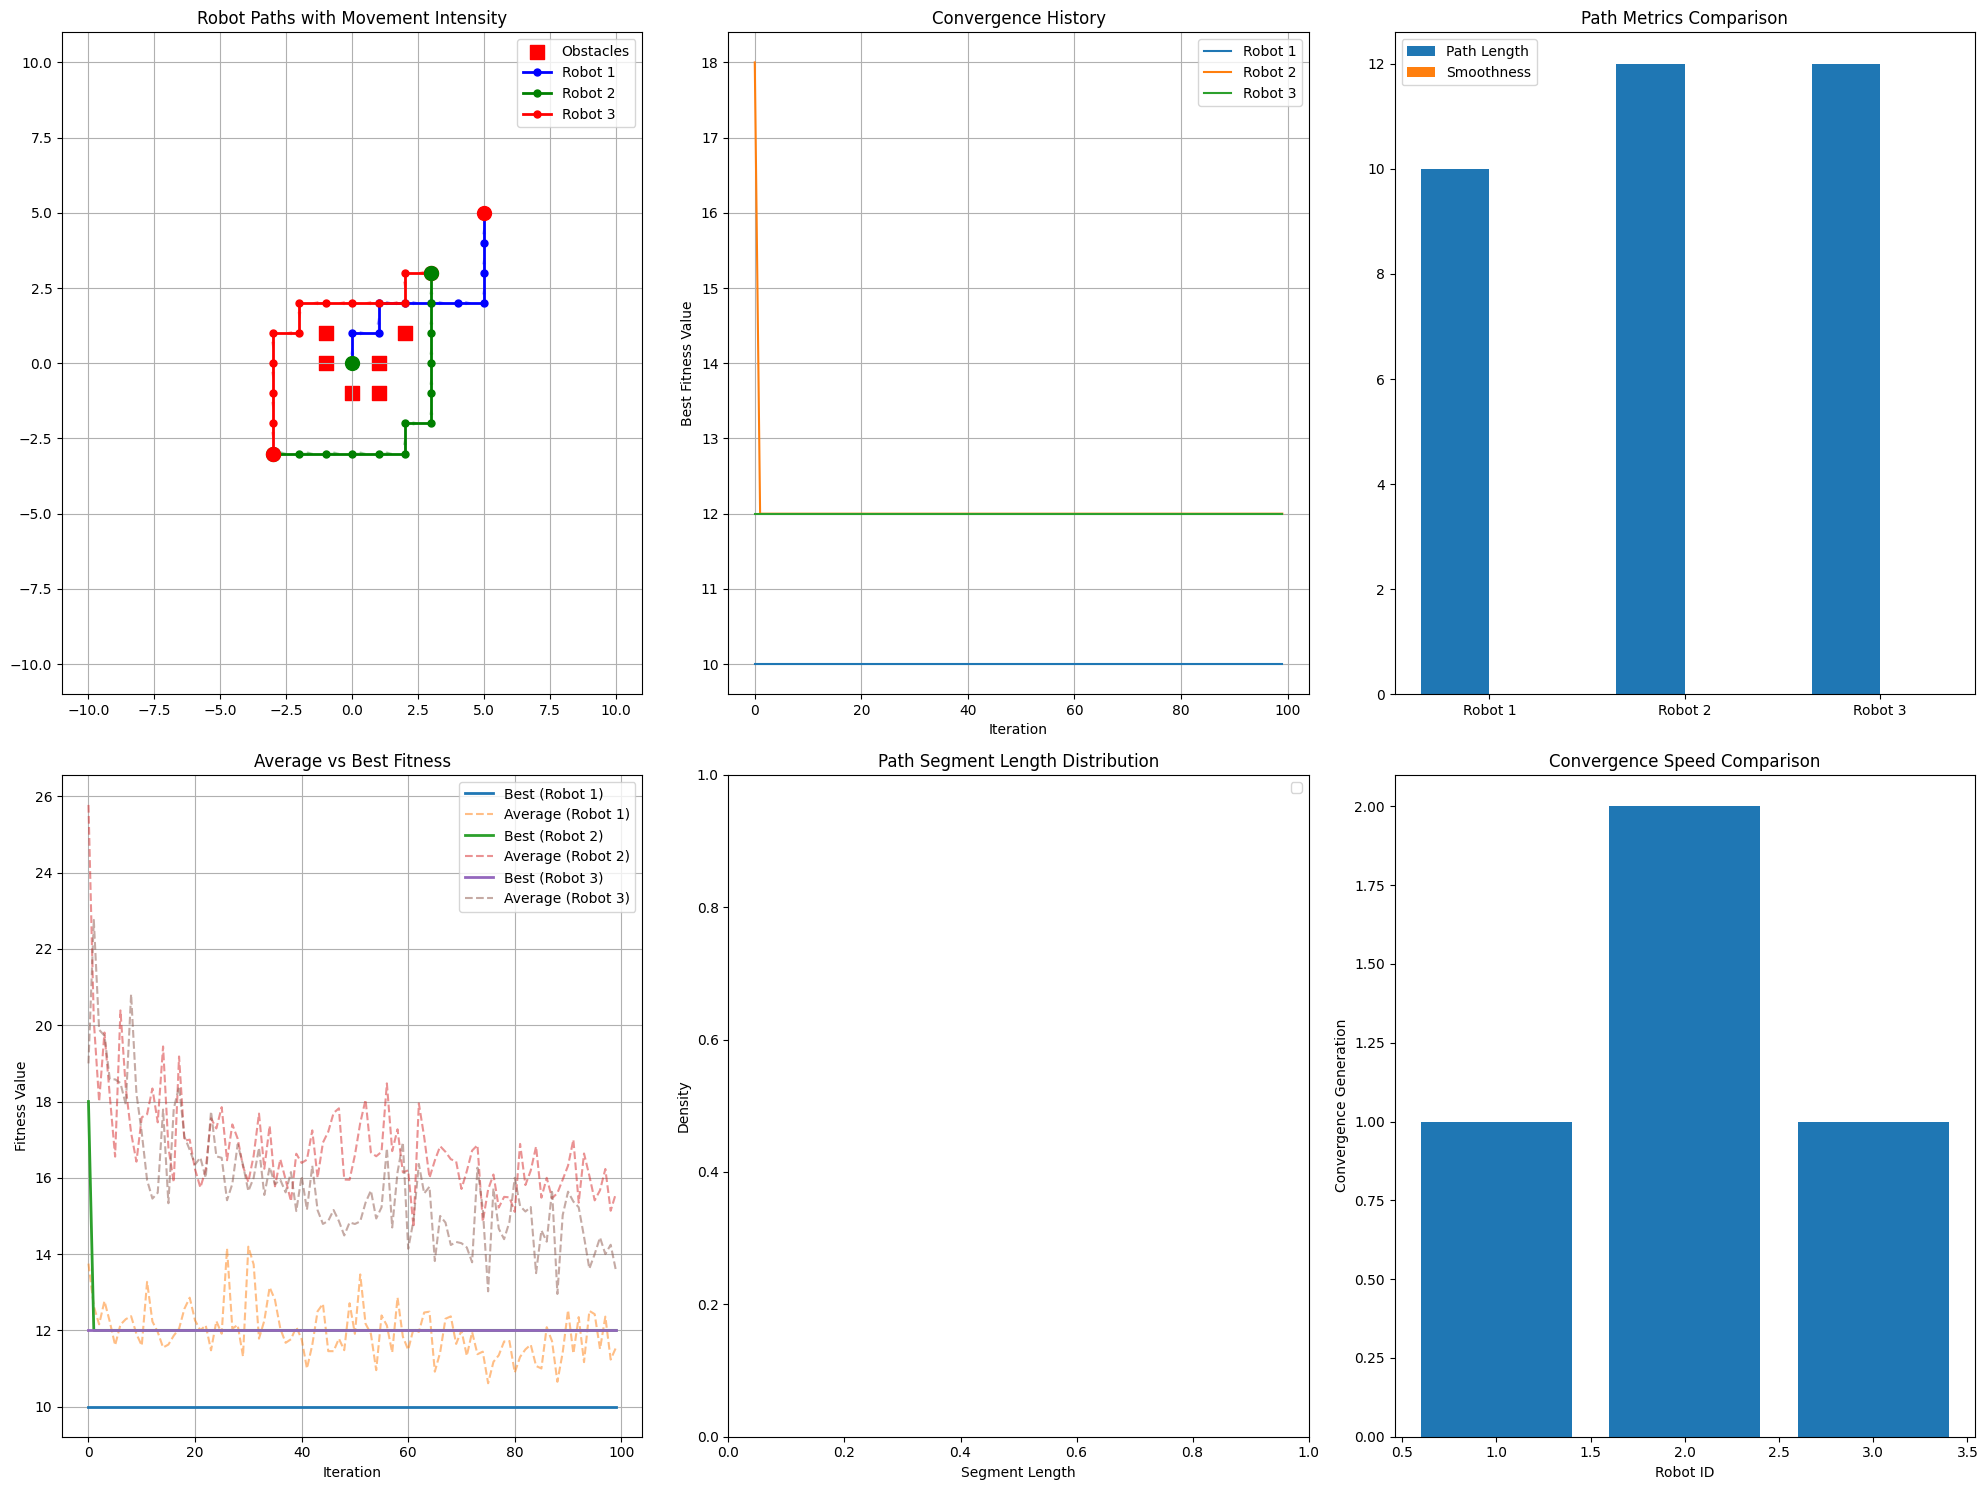

In [ ]:
import numpy as np
from copy import deepcopy
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

class ACO(Robot):
    def __init__(self, robot_id, start_point, end_point, n_ants=50, n_iterations=100,
                 evaporation_rate=0.1, alpha=1.0, beta=2.0, Q=1.0):
        """
        Initialize ACO algorithm with parameters.

        Args:
            robot_id: Unique identifier for the robot
            start_point: Starting coordinates (x, y)
            end_point: Goal coordinates (x, y)
            n_ants: Number of ants in the colony
            n_iterations: Maximum number of iterations
            evaporation_rate: Pheromone evaporation rate
            alpha: Pheromone influence factor
            beta: Heuristic influence factor
            Q: Pheromone deposit factor
        """
        super().__init__(robot_id, start_point, end_point)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.best_path = None
        self.best_fitness = float('inf')

    def initialize_pheromone_matrix(self, grid_size):
        """Initialize pheromone matrix with small random values."""
        matrix_size = 2 * grid_size + 1  # Account for negative coordinates
        self.pheromone = np.ones((matrix_size, matrix_size, matrix_size, matrix_size)) * 0.1
        self.grid_size = grid_size

    def coordinate_to_index(self, coord):
        """Convert grid coordinates to matrix indices."""
        return coord[0] + self.grid_size, coord[1] + self.grid_size

    def get_valid_neighbors(self, current, robot_step_size, visited, obstacles):
        """Get valid neighboring positions for an ant to move to."""
        neighbors = []
        for dx in range(-robot_step_size, robot_step_size + 1):
            for dy in range(-robot_step_size, robot_step_size + 1):
                if dx == 0 and dy == 0:
                    continue

                new_pos = (current[0] + dx, current[1] + dy)

                # Check grid boundaries
                if abs(new_pos[0]) > self.grid_size or abs(new_pos[1]) > self.grid_size:
                    continue

                # Check step size constraint
                if math.sqrt(dx**2 + dy**2) > robot_step_size:
                    continue

                # Check obstacles
                if obstacles and self.check_path_collision([current, new_pos], obstacles):
                    continue

                # Check if already visited
                if new_pos in visited:
                    continue

                neighbors.append(new_pos)
        return neighbors

    def check_path_collision(self, path, obstacles):
        """Check if path segment intersects with any obstacle."""
        if not obstacles:
            return False

        p1, p2 = path
        for obstacle in obstacles:
            if self.intersects_line_point(p1, p2, obstacle):
                return True
        return False

    def intersects_line_point(self, p1, p2, point):
        """Check if line segment intersects with point (obstacle)."""
        buffer = 0.5

        if not (min(p1[0], p2[0]) - buffer <= point[0] <= max(p1[0], p2[0]) + buffer and
                min(p1[1], p2[1]) - buffer <= point[1] <= max(p1[1], p2[1]) + buffer):
            return False

        if p1 == p2:
            distance = math.sqrt((point[0] - p1[0])**2 + (point[1] - p1[1])**2)
        else:
            numerator = abs((p2[1] - p1[1])*point[0] - (p2[0] - p1[0])*point[1] +
                          p2[0]*p1[1] - p2[1]*p1[0])
            denominator = math.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
            distance = numerator/denominator

        return distance <= buffer

    def ant_tour(self, robot_step_size, obstacles):
        """Generate a single ant's tour from start to end point."""
        current = self.start_point
        path = [current]
        visited = {current}

        while current != self.end_point:
            neighbors = self.get_valid_neighbors(current, robot_step_size, visited, obstacles)

            if not neighbors:
                return None  # No valid path found

            # Calculate selection probabilities
            probs = []
            for next_pos in neighbors:
                i1, j1 = self.coordinate_to_index(current)
                i2, j2 = self.coordinate_to_index(next_pos)
                pheromone = self.pheromone[i1, j1, i2, j2]
                distance = self.calculate_distance(next_pos, self.end_point)
                if distance == 0:
                    distance = 0.1  # Avoid division by zero
                heuristic = 1.0 / distance
                prob = (pheromone ** self.alpha) * (heuristic ** self.beta)
                probs.append(prob)

            # Normalize probabilities
            probs = np.array(probs)
            probs = probs / probs.sum()

            # Select next position
            next_pos = random.choices(neighbors, weights=probs)[0]
            path.append(next_pos)
            visited.add(next_pos)
            current = next_pos

            # Break if path is too long
            if len(path) > self.grid_size * 4:
                return None

        return path

    def update_pheromones(self, paths, fitness_values):
        """Update pheromone levels based on ant paths."""
        # Evaporation
        self.pheromone *= (1 - self.evaporation_rate)

        # Deposit new pheromones
        for path, fitness in zip(paths, fitness_values):
            if fitness == 0:
                continue
            deposit = self.Q / fitness
            for i in range(len(path) - 1):
                i1, j1 = self.coordinate_to_index(path[i])
                i2, j2 = self.coordinate_to_index(path[i + 1])
                self.pheromone[i1, j1, i2, j2] += deposit
                self.pheromone[i2, j2, i1, j1] += deposit  # Symmetric update

    def optimize(self, grid_size, robot_step_size, obstacles=None):
        """Main ACO optimization loop."""
        self.initialize_pheromone_matrix(grid_size)

        best_fitness_history = []
        avg_fitness_history = []

        for iteration in range(self.n_iterations):
            valid_paths = []
            fitness_values = []

            # Generate ant tours
            for _ in range(self.n_ants):
                path = self.ant_tour(robot_step_size, obstacles)
                if path is not None:
                    self.path = path
                    self.calculate_smoothing_index()
                    fitness = self.calculate_total_objective(robot_step_size)
                    valid_paths.append(path)
                    fitness_values.append(fitness)

            if not valid_paths:
                continue

            # Update best solution
            min_fitness_idx = np.argmin(fitness_values)
            if fitness_values[min_fitness_idx] < self.best_fitness:
                self.best_fitness = fitness_values[min_fitness_idx]
                self.best_path = deepcopy(valid_paths[min_fitness_idx])

            # Update pheromones
            self.update_pheromones(valid_paths, fitness_values)

            # Record history
            best_fitness_history.append(self.best_fitness)
            avg_fitness_history.append(np.mean(fitness_values))

        return self.best_path, self.best_fitness, best_fitness_history, avg_fitness_history


def visualize_aco_results(results, grid_size, obstacles=None):
    """
    Create comprehensive visualizations for ACO results.

    Args:
        results: List of dictionaries containing results for each robot
        grid_size: Size of the grid environment
        obstacles: Set of obstacle coordinates
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Path Visualization with Pheromone Intensity
    ax1 = fig.add_subplot(231)
    colors = ['b', 'g', 'r', 'c', 'm']  # Colors for different robots

    # Plot obstacles
    if obstacles:
        ox, oy = zip(*obstacles)
        ax1.scatter(ox, oy, color='red', s=100, marker='s', label='Obstacles')

    # Plot paths and movement intensity
    for idx, result in enumerate(results):
        path = result['best_path']
        if path:
            x, y = zip(*path)
            # Plot path
            ax1.plot(x, y, f'{colors[idx%len(colors)]}-o',
                    label=f'Robot {result["robot_id"]}', linewidth=2, markersize=5)
            # Plot start and end points
            ax1.plot(result['start'][0], result['start'][1], 'go', markersize=10)
            ax1.plot(result['end'][0], result['end'][1], 'ro', markersize=10)

            # Plot movement intensity using transparency
            for i in range(len(path)-1):
                dx = path[i+1][0] - path[i][0]
                dy = path[i+1][1] - path[i][1]
                ax1.arrow(path[i][0], path[i][1], dx*0.3, dy*0.3,
                         head_width=0.1, head_length=0.2, fc=colors[idx%len(colors)],
                         ec=colors[idx%len(colors)], alpha=0.3)

    ax1.grid(True)
    ax1.set_title('Robot Paths with Movement Intensity')
    ax1.legend()
    ax1.set_xlim(-grid_size-1, grid_size+1)
    ax1.set_ylim(-grid_size-1, grid_size+1)

    # 2. Convergence History
    ax2 = fig.add_subplot(232)
    for result in results:
        ax2.plot(result['best_history'],
                label=f'Robot {result["robot_id"]}')
    ax2.set_title('Convergence History')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Best Fitness Value')
    ax2.grid(True)
    ax2.legend()

    # 3. Path Metrics Comparison
    ax3 = fig.add_subplot(233)
    robot_ids = [r['robot_id'] for r in results]
    path_lengths = [r['path_length'] for r in results]
    smoothness = [r['smoothness'] for r in results]

    x = np.arange(len(robot_ids))
    width = 0.35

    ax3.bar(x - width/2, path_lengths, width, label='Path Length')
    ax3.bar(x + width/2, smoothness, width, label='Smoothness')
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'Robot {id}' for id in robot_ids])
    ax3.set_title('Path Metrics Comparison')
    ax3.legend()

    # 4. Average vs Best Fitness
    ax4 = fig.add_subplot(234)
    for result in results:
        ax4.plot(result['best_history'],
                label=f'Best (Robot {result["robot_id"]})', linewidth=2)
        ax4.plot(result['avg_history'],
                label=f'Average (Robot {result["robot_id"]})',
                linestyle='--', alpha=0.5)
    ax4.set_title('Average vs Best Fitness')
    ax4.set_xlabel('Iteration')
    ax4.set_ylabel('Fitness Value')
    ax4.grid(True)
    ax4.legend()

    # 5. Path Segment Distribution
    ax5 = fig.add_subplot(235)
    for idx, result in enumerate(results):
        path = result['best_path']
        if path:
            segments = [math.sqrt((path[i+1][0]-path[i][0])**2 +
                                (path[i+1][1]-path[i][1])**2)
                       for i in range(len(path)-1)]
            sns.kdeplot(data=segments, label=f'Robot {result["robot_id"]}')
    ax5.set_title('Path Segment Length Distribution')
    ax5.set_xlabel('Segment Length')
    ax5.set_ylabel('Density')
    ax5.legend()

    # 6. Convergence Speed Comparison
    ax6 = fig.add_subplot(236)
    convergence_gens = [r['convergence_gen'] for r in results]
    ax6.bar(robot_ids, convergence_gens)
    ax6.set_title('Convergence Speed Comparison')
    ax6.set_xlabel('Robot ID')
    ax6.set_ylabel('Convergence Generation')

    plt.tight_layout()
    plt.show()

def update_run_multi_robot_aco_test():
    """Updated test function with visualizations."""
    # Your existing run_multi_robot_aco_test code here
    grid_size = 10
    robot_step_size = 1
    obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1,-1)}

    robots = [
        ACO(1, (0,0), (5, 5), n_ants=50, n_iterations=100),
        ACO(2, (-3,-3), (3, 3), n_ants=50, n_iterations=100),
        ACO(3, (3,3), (-3, -3), n_ants=50, n_iterations=100)
    ]

    results = []

    for robot in robots:
        print(f"\nOptimizing path for Robot {robot.id}: {robot.start_point} → {robot.end_point}")
        best_path, best_fitness, best_history, avg_history = robot.optimize(
            grid_size, robot_step_size, obstacles)

        if best_path:
            # Calculate analytics
            path_length = sum(robot.calculate_distance(best_path[i], best_path[i+1])
                            for i in range(len(best_path)-1))
            num_segments = len(best_path) - 1
            avg_segment_length = path_length / num_segments

            robot.path = best_path
            robot.calculate_smoothing_index()
            smoothness = robot.smoothing_index

            convergence_gen = next((i for i, x in enumerate(best_history[1:], 1)
                                  if abs(x - best_history[i-1]) < 0.001),
                                 len(best_history))

            results.append({
                'robot_id': robot.id,
                'start': robot.start_point,
                'end': robot.end_point,
                'path_length': path_length,
                'num_segments': num_segments,
                'avg_segment_length': avg_segment_length,
                'smoothness': smoothness,
                'best_fitness': best_fitness,
                'convergence_gen': convergence_gen,
                'best_path': best_path,
                'best_history': best_history,
                'avg_history': avg_history
            })

            # Print analytics
            print(f"\nAnalytics for Robot {robot.id}:")
            print(f"Path Length: {path_length:.2f}")
            print(f"Number of Segments: {num_segments}")
            print(f"Average Segment Length: {avg_segment_length:.2f}")
            print(f"Path Smoothness Index: {smoothness:.2f}")
            print(f"Best Fitness Score: {best_fitness:.2f}")
            print(f"Convergence Generation: {convergence_gen}")

    # Visualize results
    visualize_aco_results(results, grid_size, obstacles)

    return results

if __name__ == "__main__":
    results = update_run_multi_robot_aco_test()

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

class HHO(Robot):
    def __init__(self, robot_id, start_point, end_point,
                 harmony_memory_size=50,
                 max_iterations=100,
                 harmony_memory_considering_rate=0.7,
                 pitch_adjustment_rate=0.3):
        super().__init__(robot_id, start_point, end_point)
        self.harmony_memory_size = harmony_memory_size
        self.max_iterations = max_iterations
        self.hmcr = harmony_memory_considering_rate
        self.par = pitch_adjustment_rate
        self.best_path = None
        self.best_fitness = float('inf')
        self.harmony_memory = None
        self.grid_size = None

    def check_path_collision(self, path_segment, obstacles):
        """
        Check if a path segment collides with any obstacles.

        Args:
            path_segment: List of two points forming a line segment
            obstacles: Set of obstacle coordinates

        Returns:
            bool: True if collision detected, False otherwise
        """
        if not obstacles:
            return False

        p1, p2 = path_segment

        for obstacle in obstacles:
            # Check if obstacle point lies on the path segment
            # Using line segment collision detection
            x1, y1 = p1
            x2, y2 = p2
            ox, oy = obstacle

            # Bounding box check first (optimization)
            if not (min(x1, x2) <= ox <= max(x1, x2) and
                   min(y1, y2) <= oy <= max(y1, y2)):
                continue

            # Check if point lies on line segment
            d = abs((x2-x1)*(y1-oy) - (x1-ox)*(y2-y1)) / math.sqrt((x2-x1)**2 + (y2-y1)**2)
            if d < 0.5:  # Threshold for collision
                return True

        return False

    def get_valid_neighbors(self, current, robot_step_size, visited, obstacles):
        """Get valid neighboring positions for movement."""
        neighbors = []
        for dx in range(-robot_step_size, robot_step_size + 1):
            for dy in range(-robot_step_size, robot_step_size + 1):
                if dx == 0 and dy == 0:
                    continue

                new_pos = (current[0] + dx, current[1] + dy)

                # Check grid boundaries
                if abs(new_pos[0]) > self.grid_size or abs(new_pos[1]) > self.grid_size:
                    continue

                # Check step size constraint
                if math.sqrt(dx**2 + dy**2) > robot_step_size:
                    continue

                # Check obstacles
                if self.check_path_collision([current, new_pos], obstacles):
                    continue

                # Check if already visited
                if new_pos in visited:
                    continue

                neighbors.append(new_pos)
        return neighbors

    def initialize_harmony_memory(self, grid_size, robot_step_size, obstacles):
        """
        Initialize harmony memory with random valid paths.

        Args:
            grid_size: Size of the grid environment
            robot_step_size: Maximum step size for robot movement
            obstacles: Set of obstacle coordinates
        """
        self.harmony_memory = []
        self.grid_size = grid_size

        while len(self.harmony_memory) < self.harmony_memory_size:
            path = self.generate_random_path(grid_size, robot_step_size, obstacles)
            if path is not None:
                self.path = path
                fitness = self.calculate_total_objective(robot_step_size)
                self.harmony_memory.append({
                    'path': path,
                    'fitness': fitness
                })

        # Sort harmony memory by fitness
        self.harmony_memory.sort(key=lambda x: x['fitness'])

    def generate_random_path(self, grid_size, robot_step_size, obstacles):
        """Generate a random path from start to end point."""
        current = self.start_point
        path = [current]
        visited = {current}

        while current != self.end_point:
            neighbors = self.get_valid_neighbors(current, robot_step_size, visited, obstacles)

            if not neighbors:
                return None

            # Select a random neighbor
            next_pos = random.choice(neighbors)
            path.append(next_pos)
            visited.add(next_pos)
            current = next_pos

            # Prevent infinite loops
            if len(path) > grid_size * 4:
                return None

        return path

    def get_valid_neighbors(self, current, robot_step_size, visited, obstacles):
        """Get valid neighboring positions for movement."""
        neighbors = []
        for dx in range(-robot_step_size, robot_step_size + 1):
            for dy in range(-robot_step_size, robot_step_size + 1):
                if dx == 0 and dy == 0:
                    continue

                new_pos = (current[0] + dx, current[1] + dy)

                # Check grid boundaries
                if abs(new_pos[0]) > self.grid_size or abs(new_pos[1]) > self.grid_size:
                    continue

                # Check step size constraint
                if math.sqrt(dx**2 + dy**2) > robot_step_size:
                    continue

                # Check obstacles
                if obstacles and self.check_path_collision([current, new_pos], obstacles):
                    continue

                # Check if already visited
                if new_pos in visited:
                    continue

                neighbors.append(new_pos)
        return neighbors

    def improvise_harmony(self, existing_path, robot_step_size, obstacles):
        """
        Create a new harmony (path) through improvisation.

        Args:
            existing_path: Existing path to base improvisation on
            robot_step_size: Maximum step size for robot movement
            obstacles: Set of obstacle coordinates

        Returns:
            New improvised path
        """
        current_path = []
        current = self.start_point
        current_path.append(current)
        visited = {current}

        while current != self.end_point:
            # Harmony Memory Consideration
            if random.random() < self.hmcr:
                # Select from existing harmony memory
                reference_path = random.choice(self.harmony_memory)['path']

                # Find a neighbor in the reference path close to current position
                possible_next = [pos for pos in reference_path if
                                 math.sqrt((pos[0]-current[0])**2 + (pos[1]-current[1])**2) <= robot_step_size]

                if possible_next:
                    next_pos = random.choice(possible_next)
                else:
                    # If no suitable neighbor, choose from valid neighbors
                    neighbors = self.get_valid_neighbors(current, robot_step_size, visited, obstacles)
                    if not neighbors:
                        return None
                    next_pos = random.choice(neighbors)
            else:
                # Generate a completely random neighbor
                neighbors = self.get_valid_neighbors(current, robot_step_size, visited, obstacles)
                if not neighbors:
                    return None
                next_pos = random.choice(neighbors)

            # Pitch Adjustment
            if random.random() < self.par:
                # Slightly modify the selected position
                dx = random.uniform(-1, 1)
                dy = random.uniform(-1, 1)
                adjusted_pos = (round(next_pos[0] + dx), round(next_pos[1] + dy))

                # Validate adjusted position
                if (abs(adjusted_pos[0]) <= self.grid_size and
                    abs(adjusted_pos[1]) <= self.grid_size and
                    not self.check_path_collision([current, adjusted_pos], obstacles)):
                    next_pos = adjusted_pos

            current_path.append(next_pos)
            visited.add(next_pos)
            current = next_pos

            # Prevent infinite loops
            if len(current_path) > self.grid_size * 4:
                return None

        return current_path

    def optimize(self, grid_size, robot_step_size, obstacles=None):
        """
        Main Harmony Search optimization loop.

        Args:
            grid_size: Size of the grid environment
            robot_step_size: Maximum step size for robot movement
            obstacles: Set of obstacle coordinates

        Returns:
            Tuple of (best path, best fitness, best fitness history, average fitness history)
        """
        # Initialize harmony memory
        self.initialize_harmony_memory(grid_size, robot_step_size, obstacles)

        best_fitness_history = []
        avg_fitness_history = []

        for iteration in range(self.max_iterations):
            # Improvise a new harmony
            new_path = self.improvise_harmony(
                self.harmony_memory[0]['path'],
                robot_step_size,
                obstacles
            )

            if new_path is not None:
                self.path = new_path
                new_fitness = self.calculate_total_objective(robot_step_size)

                # Update harmony memory if new path is better
                if new_fitness < self.harmony_memory[-1]['fitness']:
                    self.harmony_memory.pop()
                    self.harmony_memory.append({
                        'path': new_path,
                        'fitness': new_fitness
                    })
                    self.harmony_memory.sort(key=lambda x: x['fitness'])

                # Update best solution
                if new_fitness < self.best_fitness:
                    self.best_fitness = new_fitness
                    self.best_path = deepcopy(new_path)

            # Record history
            best_fitness_history.append(self.harmony_memory[0]['fitness'])
            avg_fitness_history.append(
                sum(entry['fitness'] for entry in self.harmony_memory) / len(self.harmony_memory)
            )

        return self.best_path, self.best_fitness, best_fitness_history, avg_fitness_history


def visualize_hho_results(results, grid_size, obstacles=None):
    """
    Create comprehensive visualizations for HHO results.

    Args:
        results: List of dictionaries containing results for each robot
        grid_size: Size of the grid environment
        obstacles: Set of obstacle coordinates
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Path Visualization with Movement Intensity
    ax1 = fig.add_subplot(231)
    colors = ['b', 'g', 'r', 'c', 'm']  # Colors for different robots

    # Plot obstacles
    if obstacles:
        ox, oy = zip(*obstacles)
        ax1.scatter(ox, oy, color='red', s=100, marker='s', label='Obstacles')

    # Plot paths and movement intensity
    for idx, result in enumerate(results):
        path = result['best_path']
        if path:
            x, y = zip(*path)
            # Plot path
            ax1.plot(x, y, f'{colors[idx%len(colors)]}-o',
                    label=f'Robot {result["robot_id"]}', linewidth=2, markersize=5)
            # Plot start and end points
            ax1.plot(result['start'][0], result['start'][1], 'go', markersize=10)
            ax1.plot(result['end'][0], result['end'][1], 'ro', markersize=10)

            # Plot movement intensity using transparency
            for i in range(len(path)-1):
                dx = path[i+1][0] - path[i][0]
                dy = path[i+1][1] - path[i][1]
                ax1.arrow(path[i][0], path[i][1], dx*0.3, dy*0.3,
                         head_width=0.1, head_length=0.2, fc=colors[idx%len(colors)],
                         ec=colors[idx%len(colors)], alpha=0.3)

    ax1.grid(True)
    ax1.set_title('Robot Paths with Movement Intensity')
    ax1.legend()
    ax1.set_xlim(-grid_size, grid_size)
    ax1.set_ylim(-grid_size, grid_size)
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')

    # 2. Fitness Evolution Plot
    ax2 = fig.add_subplot(232)
    for idx, result in enumerate(results):
        ax2.plot(result['best_fitness_history'],
                 label=f'Robot {result["robot_id"]} Best Fitness',
                 color=colors[idx%len(colors)])
        ax2.plot(result['avg_fitness_history'],
                 label=f'Robot {result["robot_id"]} Avg Fitness',
                 color=colors[idx%len(colors)], linestyle='--')

    ax2.set_title('Fitness Evolution')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Fitness Value')
    ax2.legend()
    ax2.set_yscale('log')

    # 3. Path Smoothness Analysis
    ax3 = fig.add_subplot(233)
    smoothness_values = [result['best_smoothing_index'] for result in results]
    ax3.bar(range(len(smoothness_values)), smoothness_values,
            color=colors[:len(smoothness_values)])
    ax3.set_title('Path Smoothness Index')
    ax3.set_xlabel('Robot ID')
    ax3.set_ylabel('Smoothing Index')
    ax3.set_xticks(range(len(smoothness_values)))
    ax3.set_xticklabels([result['robot_id'] for result in results])

    # 4. Path Length Comparison
    ax4 = fig.add_subplot(234)
    path_lengths = [result['best_path_length'] for result in results]
    ax4.bar(range(len(path_lengths)), path_lengths,
            color=colors[:len(path_lengths)])
    ax4.set_title('Path Length Comparison')
    ax4.set_xlabel('Robot ID')
    ax4.set_ylabel('Path Length')
    ax4.set_xticks(range(len(path_lengths)))
    ax4.set_xticklabels([result['robot_id'] for result in results])

    # 5. Computational Performance
    ax5 = fig.add_subplot(235)
    computation_times = [result['computation_time'] for result in results]
    ax5.bar(range(len(computation_times)), computation_times,
            color=colors[:len(computation_times)])
    ax5.set_title('Computation Time')
    ax5.set_xlabel('Robot ID')
    ax5.set_ylabel('Time (seconds)')
    ax5.set_xticks(range(len(computation_times)))
    ax5.set_xticklabels([result['robot_id'] for result in results])

    # 6. Path Deviation from Direct Line
    ax6 = fig.add_subplot(236)
    path_deviations = [result['path_deviation'] for result in results]
    ax6.bar(range(len(path_deviations)), path_deviations,
            color=colors[:len(path_deviations)])
    ax6.set_title('Path Deviation from Direct Line')
    ax6.set_xlabel('Robot ID')
    ax6.set_ylabel('Deviation Ratio')
    ax6.set_xticks(range(len(path_deviations)))
    ax6.set_xticklabels([result['robot_id'] for result in results])

    plt.tight_layout()
    plt.show()

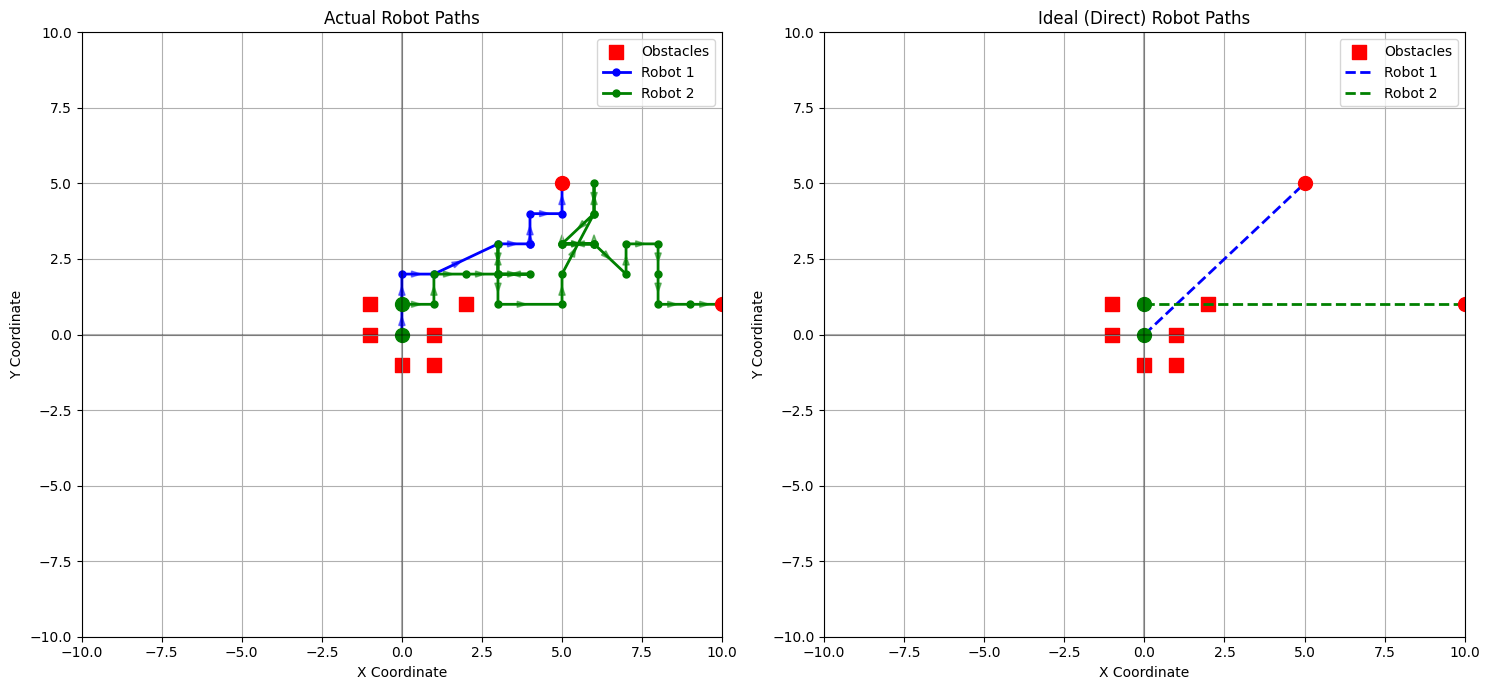

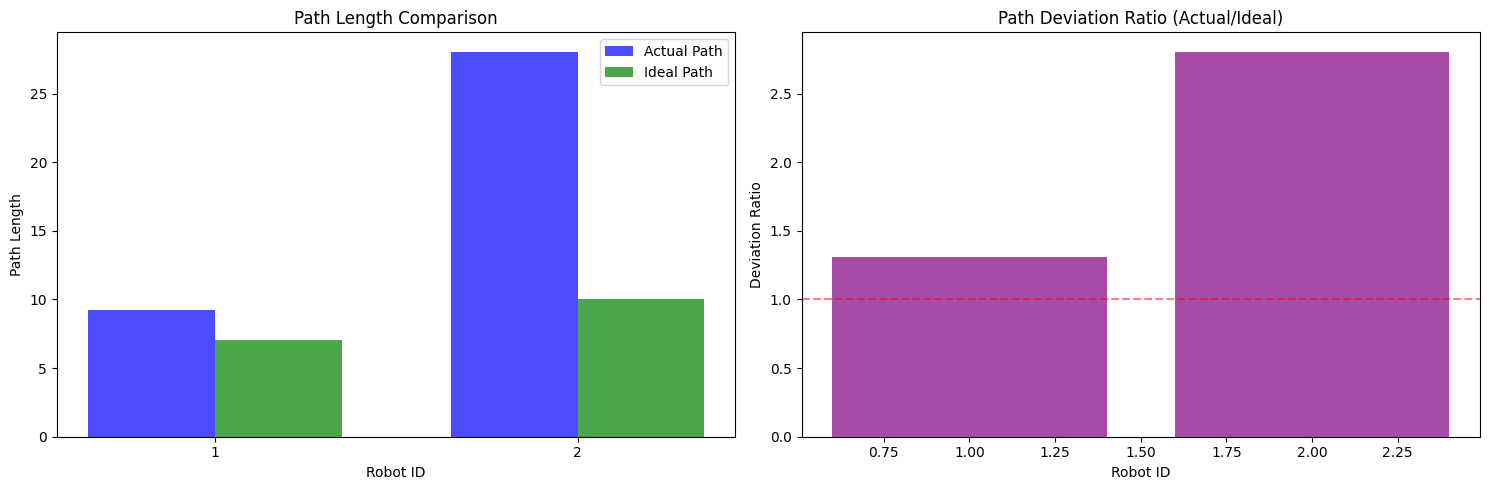

In [ ]:
  import matplotlib.pyplot as plt
  import numpy as np

  def plot_robot_paths(actual_results, ideal_results, obstacles=None, grid_size=10):
      """
      Create separate visualizations for actual and ideal robot paths.

      Args:
          actual_results: List of dictionaries containing actual path results
          ideal_results: List of dictionaries containing ideal path results
          obstacles: Set of obstacle coordinates
          grid_size: Size of the grid environment
      """
      # Create a figure with two subplots side by side
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

      # Colors for different robots
      colors = ['blue', 'green', 'red', 'purple', 'orange']

      # Plot 1: Actual Paths
      ax1.set_title('Actual Robot Paths')
      if obstacles:
          obs_x, obs_y = zip(*obstacles)
          ax1.scatter(obs_x, obs_y, color='red', s=100, marker='s', label='Obstacles')

      for idx, result in enumerate(actual_results):
          path = np.array(result['path'])
          color = colors[idx % len(colors)]

          # Plot path with color and marker separately
          ax1.plot(path[:, 0], path[:, 1], color=color, marker='o',
                  label=f'Robot {result["robot_id"]}',
                  linewidth=2, markersize=5)

          # Plot start and end points
          ax1.plot(result['start_point'][0], result['start_point'][1], marker='o', color='g', markersize=10)
          ax1.plot(result['end_point'][0], result['end_point'][1], marker='o', color='r', markersize=10)

          # Add arrows to show direction
          for i in range(len(path)-1):
              dx = path[i+1][0] - path[i][0]
              dy = path[i+1][1] - path[i][1]
              ax1.arrow(path[i][0], path[i][1], dx*0.3, dy*0.3,
                      head_width=0.2, head_length=0.3, fc=color, ec=color, alpha=0.5)

      # Plot 2: Ideal Paths
      ax2.set_title('Ideal (Direct) Robot Paths')
      if obstacles:
          ax2.scatter(obs_x, obs_y, color='red', s=100, marker='s', label='Obstacles')

      for idx, result in enumerate(ideal_results):
          start = result['start_point']
          end = result['end_point']
          color = colors[idx % len(colors)]

          # Plot direct path with dashed line
          ax2.plot([start[0], end[0]], [start[1], end[1]], color=color, linestyle='--',
                  label=f'Robot {result["robot_id"]}',
                  linewidth=2)

          # Plot start and end points
          ax2.plot(start[0], start[1], marker='o', color='g', markersize=10)
          ax2.plot(end[0], end[1], marker='o', color='r', markersize=10)

      # Common settings for both plots
      for ax in [ax1, ax2]:
          ax.grid(True)
          ax.set_xlim(-grid_size, grid_size)
          ax.set_ylim(-grid_size, grid_size)
          ax.set_xlabel('X Coordinate')
          ax.set_ylabel('Y Coordinate')
          ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
          ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
          ax.legend()

      plt.tight_layout()
      plt.show()

      # Create metrics comparison plot
      fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

      # Path Length Comparison
      robot_ids = [r['robot_id'] for r in actual_results]
      actual_lengths = [np.sum(np.sqrt(np.sum(np.diff(r['path'], axis=0)**2, axis=1))) for r in actual_results]
      ideal_lengths = [np.sqrt(np.sum((np.array(r['end_point']) - np.array(r['start_point']))**2)) for r in ideal_results]

      x = np.arange(len(robot_ids))
      width = 0.35

      ax3.bar(x - width/2, actual_lengths, width, label='Actual Path', color='blue', alpha=0.7)
      ax3.bar(x + width/2, ideal_lengths, width, label='Ideal Path', color='green', alpha=0.7)
      ax3.set_title('Path Length Comparison')
      ax3.set_xlabel('Robot ID')
      ax3.set_ylabel('Path Length')
      ax3.set_xticks(x)
      ax3.set_xticklabels(robot_ids)
      ax3.legend()

      # Path Deviation Ratio
      deviation_ratios = [actual/ideal for actual, ideal in zip(actual_lengths, ideal_lengths)]
      ax4.bar(robot_ids, deviation_ratios, color='purple', alpha=0.7)
      ax4.set_title('Path Deviation Ratio (Actual/Ideal)')
      ax4.set_xlabel('Robot ID')
      ax4.set_ylabel('Deviation Ratio')
      ax4.axhline(y=1, color='r', linestyle='--', alpha=0.5)

      plt.tight_layout()
      plt.show()

  def get_ideal_path(start, end, obstacles, grid_size):
      """
      Generate an ideal path that avoids obstacles while being as efficient as possible.
      Using A* algorithm for ideal path generation.
      """
      def heuristic(a, b):
          return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

      def get_neighbors(pos):
          neighbors = []
          for dx, dy in [(0,1), (1,0), (0,-1), (-1,0), (1,1), (-1,1), (1,-1), (-1,-1)]:
              new_pos = (pos[0] + dx, pos[1] + dy)
              if (-grid_size <= new_pos[0] <= grid_size and
                  -grid_size <= new_pos[1] <= grid_size and
                  new_pos not in obstacles):
                  neighbors.append(new_pos)
          return neighbors

      # A* implementation
      start = tuple(start)
      end = tuple(end)
      frontier = [(0, start)]
      came_from = {start: None}
      cost_so_far = {start: 0}

      while frontier:
          current = frontier.pop(0)[1]

          if current == end:
              break

          for next_pos in get_neighbors(current):
              new_cost = cost_so_far[current] + heuristic(current, next_pos)

              if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                  cost_so_far[next_pos] = new_cost
                  priority = new_cost + heuristic(next_pos, end)
                  frontier.append((priority, next_pos))
                  frontier.sort()  # Sort by priority
                  came_from[next_pos] = current

      # Reconstruct path
      current = end
      path = []
      while current is not None:
          path.append(current)
          current = came_from.get(current)
      path.reverse()

      return path

  def run_hho_optimization(robot, grid_size, robot_step_size, obstacles):
      """
      Run HHO algorithm to generate optimized path for a robot.
      """
      hho = HHO(robot.id, robot.start_point, robot.end_point,
                harmony_memory_size=50,
                max_iterations=100)

      best_path, best_fitness, _, _ = hho.optimize(grid_size, robot_step_size, obstacles)
      return best_path, best_fitness

  grid_size = 10
  robot_step_size = 1
  obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1,-1)}

  # Create robots
  robots = [
      Robot(1, (0, 0), (5, 5)),
      Robot(2, (0, 1), (10, 1))
  ]

  # Generate actual and ideal results
  actual_results = []
  ideal_results = []

  for robot in robots:
      # Generate actual path using HHO
      actual_path, fitness = run_hho_optimization(robot, grid_size, robot_step_size, obstacles)
      actual_results.append({
          'robot_id': robot.id,
          'start_point': robot.start_point,
          'end_point': robot.end_point,
          'path': actual_path,
          'fitness': fitness
      })

      # Generate ideal path
      ideal_path = get_ideal_path(robot.start_point, robot.end_point, obstacles, grid_size)
      ideal_results.append({
          'robot_id': robot.id,
          'start_point': robot.start_point,
          'end_point': robot.end_point,
          'path': ideal_path
      })

  # Use the existing plot_robot_paths function to visualize results
  plot_robot_paths(actual_results, ideal_results, obstacles, grid_size)


Results for Robot 1:
Parameters:
  harmony_memory_size: 50
  max_iterations: 100
  harmony_memory_considering_rate: 0.7
  pitch_adjustment_rate: 0.3

Performance Metrics:
  avg_path_length: 9.625798040898392
  std_path_length: 0.516867475596243
  avg_convergence_iteration: 0.0
  avg_smoothness: 0.9414787247577987
  avg_deviation: 1.3612934138102877
  avg_safety_distance: 1.0


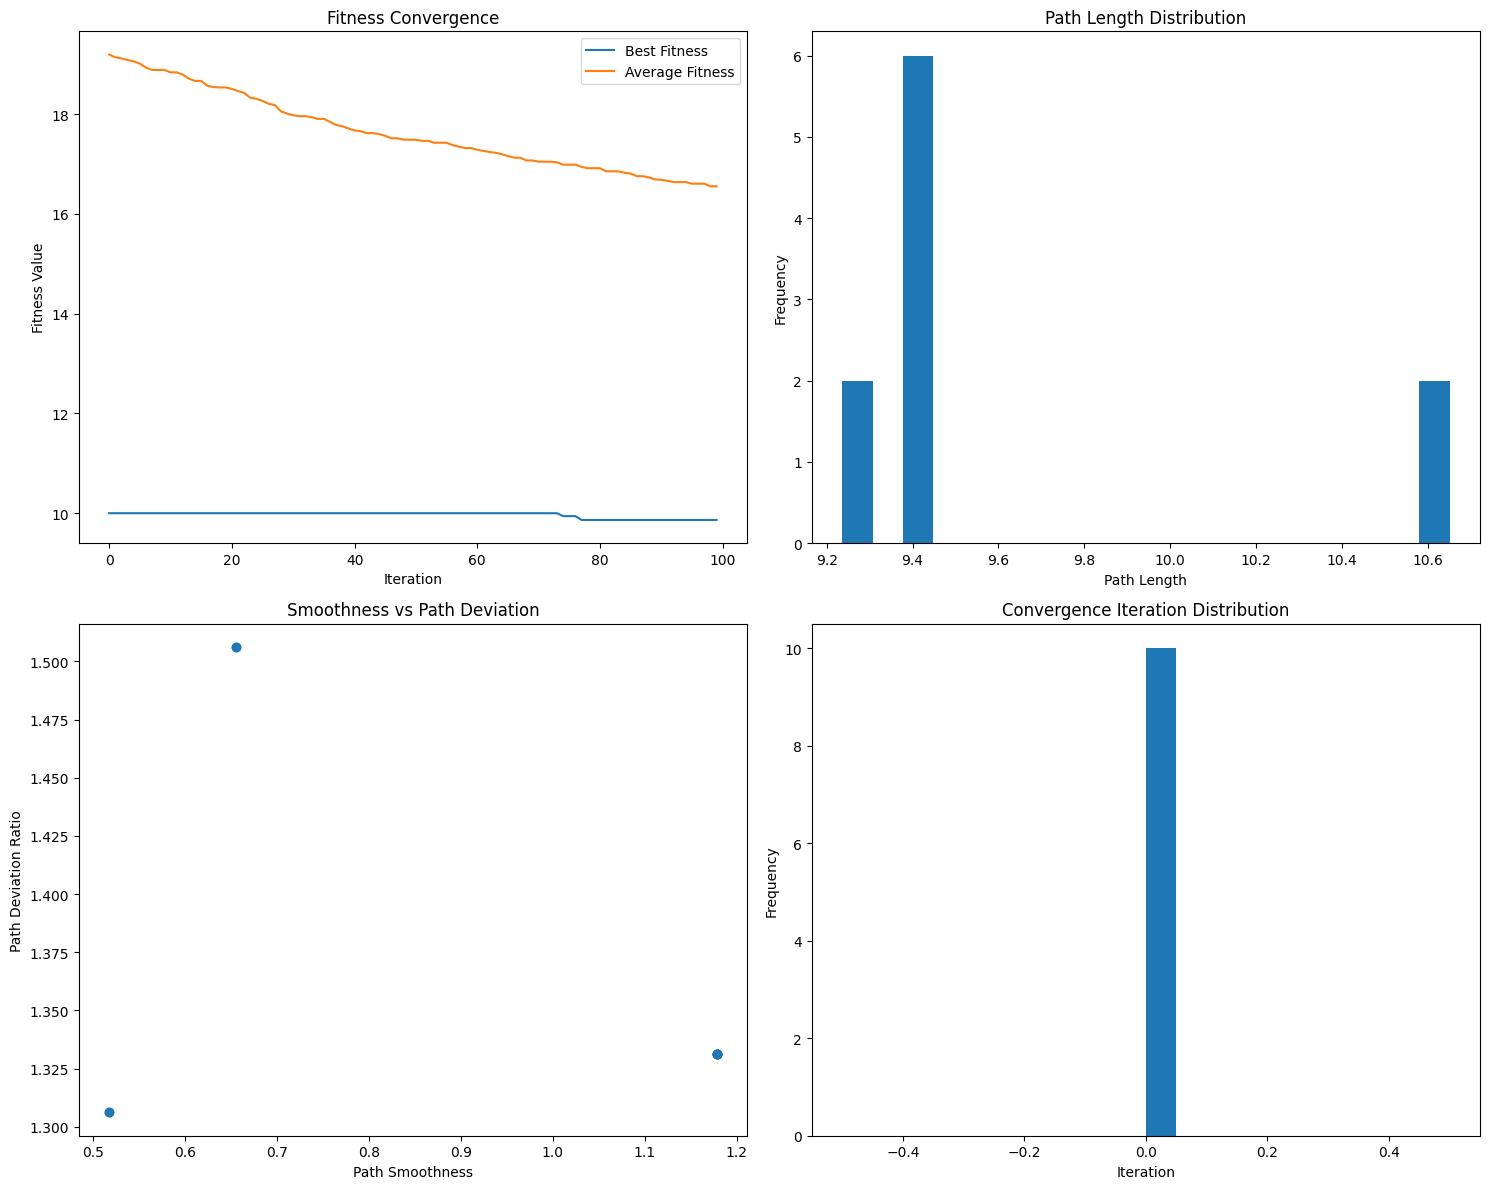


Results for Robot 2:
Parameters:
  harmony_memory_size: 50
  max_iterations: 100
  harmony_memory_considering_rate: 0.7
  pitch_adjustment_rate: 0.3

Performance Metrics:
  avg_path_length: 17.013337880974326
  std_path_length: 1.2085345840658834
  avg_convergence_iteration: 0.0
  avg_smoothness: 0.9445275989759148
  avg_deviation: 1.7013337880974326
  avg_safety_distance: 1.0


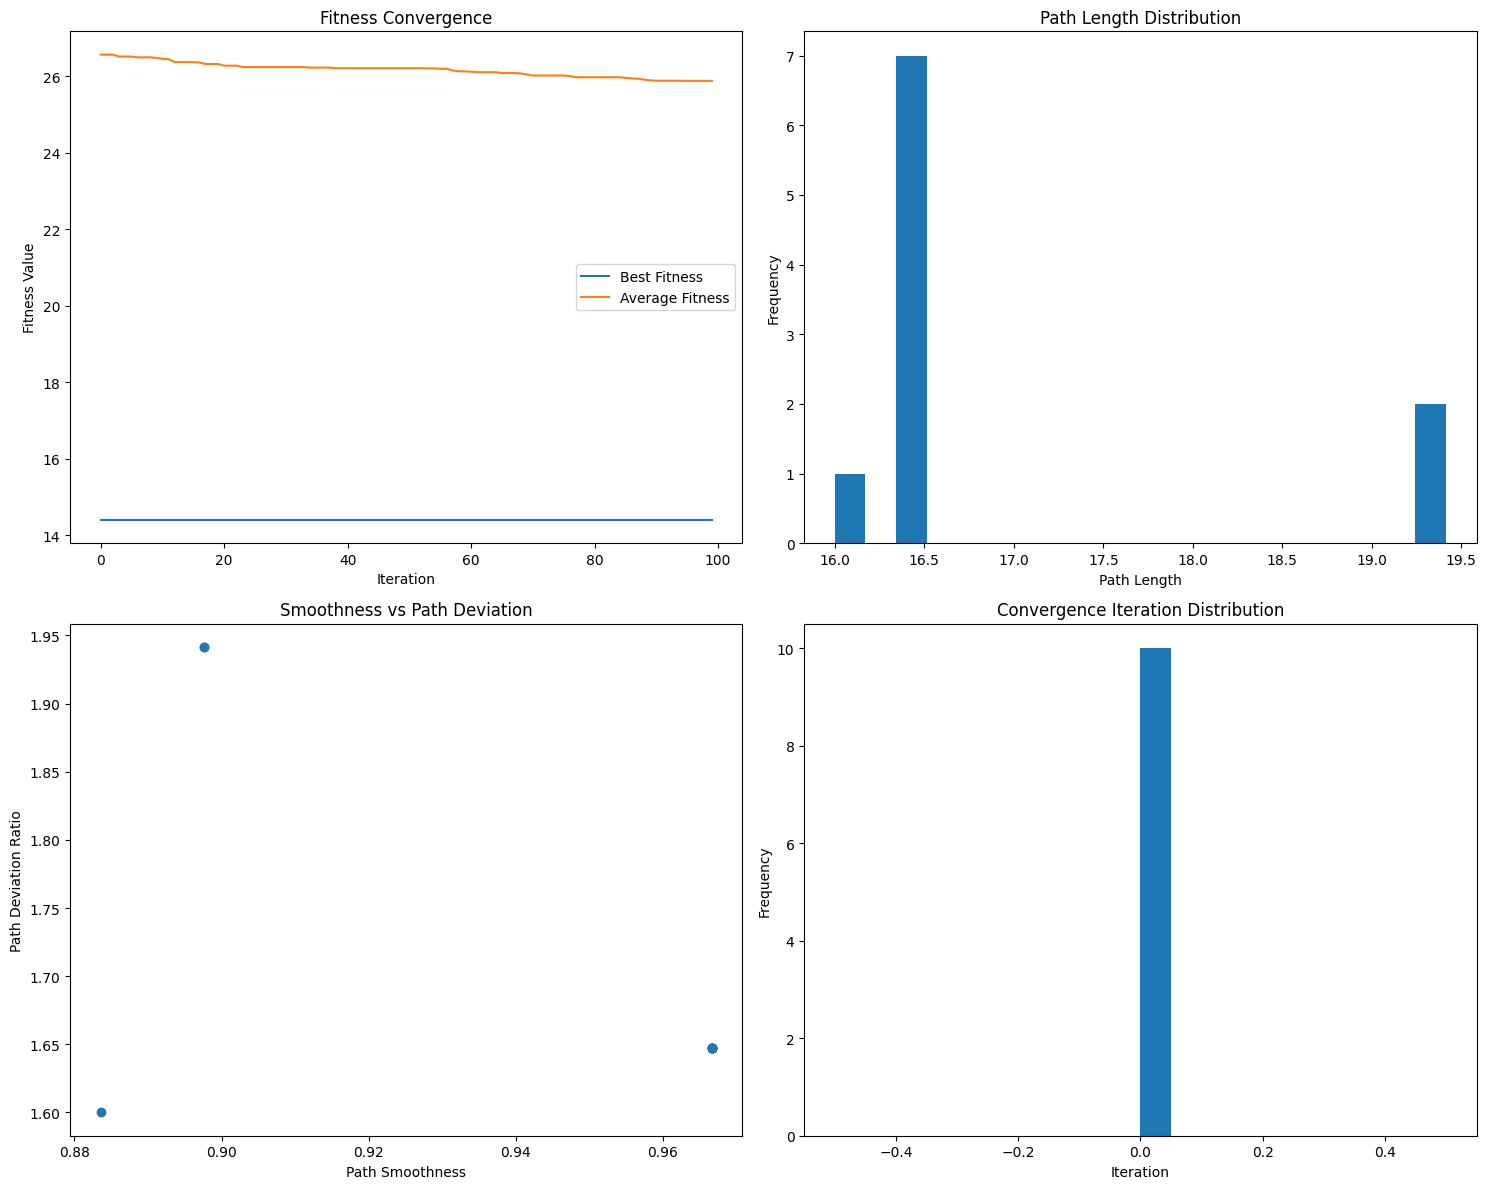

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

class HHOAnalyzer:
    def __init__(self, hho_instance):
        self.hho = hho_instance
        self.metrics = {
            'parameters': {
                'harmony_memory_size': hho_instance.harmony_memory_size,
                'max_iterations': hho_instance.max_iterations,
                'harmony_memory_considering_rate': hho_instance.hmcr,
                'pitch_adjustment_rate': hho_instance.par
            },
            'optimization_metrics': {
                'best_fitness_history': [],
                'avg_fitness_history': [],
                'path_lengths': [],
                'best_paths': [],
                'convergence_iterations': []
            },
            'path_metrics': {
                'smoothness': [],
                'safety_distances': [],
                'path_deviations': []
            }
        }

    def analyze_run(self, best_path, best_fitness, best_fitness_history, avg_fitness_history, obstacles=None):
        """Analyze a single optimization run"""
        # Store fitness histories
        self.metrics['optimization_metrics']['best_fitness_history'].append(best_fitness_history)
        self.metrics['optimization_metrics']['avg_fitness_history'].append(avg_fitness_history)

        # Calculate path length
        if best_path:
            path_length = self.calculate_path_length(best_path)
            self.metrics['optimization_metrics']['path_lengths'].append(path_length)
            self.metrics['optimization_metrics']['best_paths'].append(best_path)

            # Calculate convergence iteration
            convergence_it = self.find_convergence_iteration(best_fitness_history)
            self.metrics['optimization_metrics']['convergence_iterations'].append(convergence_it)

            # Calculate path metrics
            self.metrics['path_metrics']['smoothness'].append(self.calculate_smoothness(best_path))
            self.metrics['path_metrics']['path_deviations'].append(
                self.calculate_path_deviation(best_path, self.hho.start_point, self.hho.end_point)
            )
            if obstacles:
                self.metrics['path_metrics']['safety_distances'].append(
                    self.calculate_safety_distance(best_path, obstacles)
                )

    def calculate_path_length(self, path):
        """Calculate total path length"""
        length = 0
        for i in range(len(path)-1):
            dx = path[i+1][0] - path[i][0]
            dy = path[i+1][1] - path[i][1]
            length += np.sqrt(dx**2 + dy**2)
        return length

    def calculate_smoothness(self, path):
        """Calculate path smoothness using angle changes"""
        if len(path) < 3:
            return 0
        angles = []
        for i in range(1, len(path)-1):
            v1 = np.array(path[i]) - np.array(path[i-1])
            v2 = np.array(path[i+1]) - np.array(path[i])
            angle = np.arctan2(np.cross(v1, v2), np.dot(v1, v2))
            angles.append(abs(angle))
        return np.mean(angles)

    def calculate_safety_distance(self, path, obstacles):
        """Calculate minimum distance to obstacles"""
        min_dist = float('inf')
        for point in path:
            for obs in obstacles:
                dist = np.sqrt((point[0] - obs[0])**2 + (point[1] - obs[1])**2)
                min_dist = min(min_dist, dist)
        return min_dist

    def calculate_path_deviation(self, path, start, end):
        """Calculate deviation from ideal straight line"""
        ideal_length = np.sqrt(np.sum((np.array(end) - np.array(start))**2))
        actual_length = self.calculate_path_length(path)
        return actual_length / ideal_length if ideal_length > 0 else float('inf')

    def find_convergence_iteration(self, fitness_history, window=5, threshold=1e-6):
        """Find iteration where algorithm converges"""
        if len(fitness_history) < window:
            return len(fitness_history)

        for i in range(len(fitness_history) - window):
            if abs(fitness_history[i] - fitness_history[i+window]) < threshold:
                return i
        return len(fitness_history)

    def generate_summary(self):
        """Generate statistical summary of metrics"""
        return {
            'parameters': self.metrics['parameters'],
            'optimization_performance': {
                'avg_path_length': np.mean(self.metrics['optimization_metrics']['path_lengths']),
                'std_path_length': np.std(self.metrics['optimization_metrics']['path_lengths']),
                'avg_convergence_iteration': np.mean(self.metrics['optimization_metrics']['convergence_iterations']),
                'avg_smoothness': np.mean(self.metrics['path_metrics']['smoothness']),
                'avg_deviation': np.mean(self.metrics['path_metrics']['path_deviations']),
                'avg_safety_distance': np.mean(self.metrics['path_metrics']['safety_distances']) if self.metrics['path_metrics']['safety_distances'] else None
            }
        }

    def plot_metrics(self):
        """Generate comprehensive visualization of metrics"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Plot fitness convergence
        best_fitness_history = np.mean(self.metrics['optimization_metrics']['best_fitness_history'], axis=0)
        avg_fitness_history = np.mean(self.metrics['optimization_metrics']['avg_fitness_history'], axis=0)

        axes[0,0].plot(best_fitness_history, label='Best Fitness')
        axes[0,0].plot(avg_fitness_history, label='Average Fitness')
        axes[0,0].set_title('Fitness Convergence')
        axes[0,0].set_xlabel('Iteration')
        axes[0,0].set_ylabel('Fitness Value')
        axes[0,0].legend()

        # Plot path lengths distribution
        axes[0,1].hist(self.metrics['optimization_metrics']['path_lengths'], bins=20)
        axes[0,1].set_title('Path Length Distribution')
        axes[0,1].set_xlabel('Path Length')
        axes[0,1].set_ylabel('Frequency')

        # Plot smoothness vs deviation
        axes[1,0].scatter(self.metrics['path_metrics']['smoothness'],
                         self.metrics['path_metrics']['path_deviations'])
        axes[1,0].set_title('Smoothness vs Path Deviation')
        axes[1,0].set_xlabel('Path Smoothness')
        axes[1,0].set_ylabel('Path Deviation Ratio')

        # Plot convergence iterations distribution
        axes[1,1].hist(self.metrics['optimization_metrics']['convergence_iterations'], bins=20)
        axes[1,1].set_title('Convergence Iteration Distribution')
        axes[1,1].set_xlabel('Iteration')
        axes[1,1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Setup environment
    grid_size = 10
    robot_step_size = 1
    obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1,-1)}

    # Create robots
    robots = [
        Robot(1, (0, 0), (5, 5)),
        Robot(2, (0, 1), (10, 1))
    ]

    # Run optimization for each robot
    for robot in robots:
        # Create HHO instance
        hho = HHO(robot.id, robot.start_point, robot.end_point,
                  harmony_memory_size=50,
                  max_iterations=100)

        # Create analyzer
        analyzer = HHOAnalyzer(hho)

        # Run multiple trials
        n_trials = 10
        for _ in range(n_trials):
            # Run optimization
            best_path, best_fitness, best_fitness_history, avg_fitness_history = hho.optimize(
                grid_size, robot_step_size, obstacles
            )

            # Analyze results
            analyzer.analyze_run(best_path, best_fitness, best_fitness_history,
                               avg_fitness_history, obstacles)

        # Generate and print summary
        summary = analyzer.generate_summary()
        print(f"\nResults for Robot {robot.id}:")
        print("Parameters:")
        for param, value in summary['parameters'].items():
            print(f"  {param}: {value}")
        print("\nPerformance Metrics:")
        for metric, value in summary['optimization_performance'].items():
            print(f"  {metric}: {value}")

        # Plot metrics
        analyzer.plot_metrics()


Testing Robot 1: (0, 0) → (5, 5)

Testing Robot 2: (-3, -3) → (3, 3)

Testing Robot 3: (3, 3) → (-3, -3)


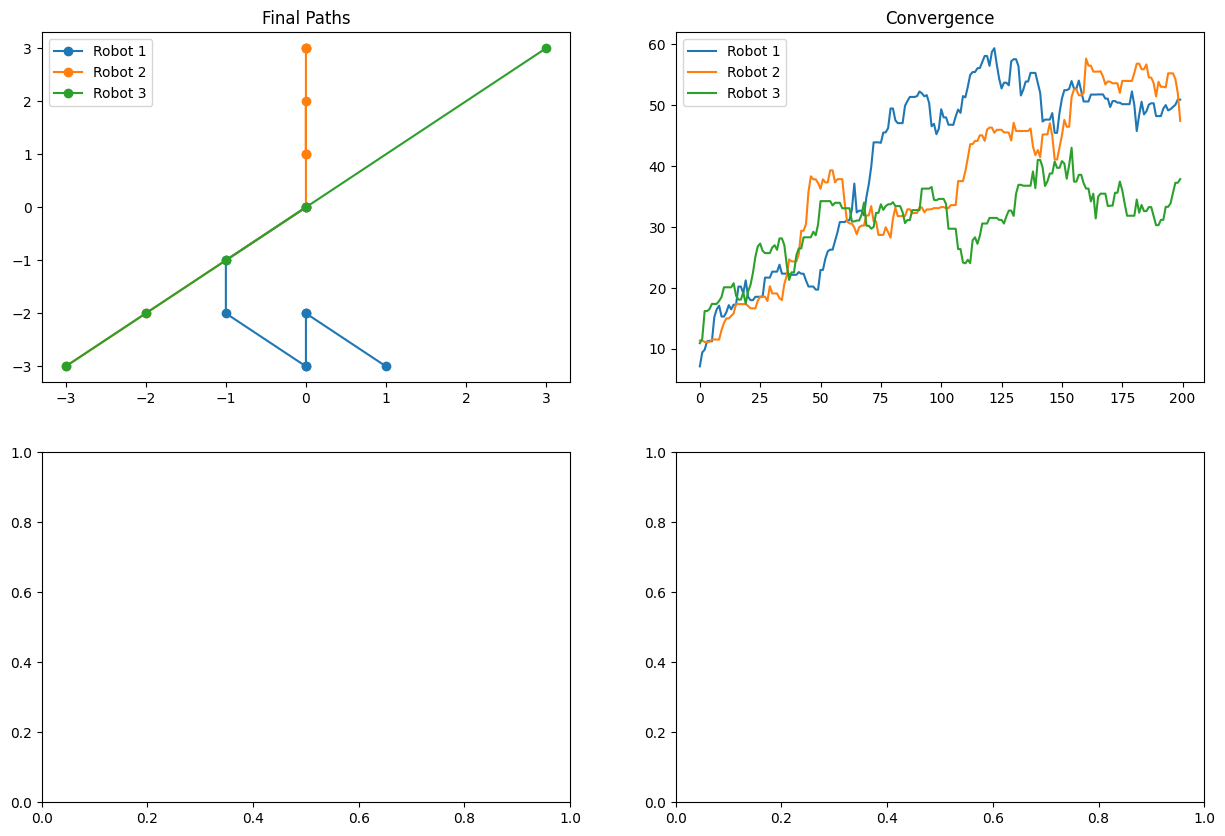

In [ ]:
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

class Thanos(Robot):
    def __init__(self, robot_id, start_point, end_point, population_size=50, elite_size=2,
                 mutation_rate=0.2, max_generations=100):
        super().__init__(robot_id, start_point, end_point)
        self.population_size = population_size
        self.elite_size = elite_size
        self.mutation_rate = mutation_rate
        self.max_generations = max_generations
        self.population = []
        self.best_fitness = float('inf')
        self.best_path = None

    def check_path_collision(self, path, obstacles):
        """Check if path collides with obstacles."""
        if not obstacles:
            return False

        for i in range(len(path) - 1):
            p1, p2 = path[i], path[i + 1]
            for obstacle in obstacles:
                if self.intersects_line_point(p1, p2, obstacle):
                    return True
        return False

    def intersects_line_point(self, p1, p2, point):
        """Check if line segment intersects with point (obstacle)."""
        buffer = 0.5
        if not (min(p1[0], p2[0]) - buffer <= point[0] <= max(p1[0], p2[0]) + buffer and
                min(p1[1], p2[1]) - buffer <= point[1] <= max(p1[1], p2[1]) + buffer):
            return False

        if p1 == p2:
            distance = math.sqrt((point[0] - p1[0])**2 + (point[1] - p1[1])**2)
        else:
            numerator = abs((p2[1] - p1[1]) * point[0] - (p2[0] - p1[0]) * point[1] +
                            p2[0] * p1[1] - p2[1] * p1[0])
            denominator = math.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
            distance = numerator / denominator

        return distance <= buffer

    def generate_initial_population(self, grid_size, robot_step_size, obstacles=None):
        """Generate initial population of random paths."""
        self.population = []
        attempts = 0
        max_attempts = 1000

        while len(self.population) < self.population_size and attempts < max_attempts:
            num_points = self.init_num_points_per_robot(grid_size)
            self.generate_random_path(num_points, robot_step_size, grid_size, obstacles)

            if not self.check_path_collision(self.path, obstacles):
                self.population.append(deepcopy(self.path))
            attempts += 1

    def calculate_fitness(self, path, robot_step_size, obstacles=None):
        """Calculate fitness with penalty for obstacle collision."""
        self.path = path
        self.calculate_smoothing_index()
        fitness = self.calculate_total_objective(robot_step_size)

        # Add large penalty for obstacle collision
        if self.check_path_collision(path, obstacles):
            fitness += 1000

        return fitness

    def mutate(self, path, grid_size, robot_step_size, obstacles=None):
        """Mutate path while avoiding obstacles."""
        mutated = deepcopy(path)
        max_attempts = 10

        for i in range(1, len(mutated)-1):
            if random.random() < self.mutation_rate:
                original_point = mutated[i]

                for _ in range(max_attempts):
                    x, y = original_point
                    dx = random.randint(-robot_step_size, robot_step_size)
                    dy = random.randint(-robot_step_size, robot_step_size)
                    new_point = (
                        max(-grid_size, min(grid_size, x + dx)),
                        max(-grid_size, min(grid_size, y + dy))
                    )

                    mutated[i] = new_point
                    if not self.check_path_collision(mutated, obstacles):
                        break
                    mutated[i] = original_point

        return mutated

    def thanos_snap(self, fitness_scores):
        """Perform Thanos Snap to reduce population by half."""
        sorted_population = [x for _, x in sorted(zip(fitness_scores, self.population))]
        survivors = sorted_population[:self.elite_size]  # Keep elites
        remaining = sorted_population[self.elite_size:]

        # Randomly retain half of the remaining population
        survivors += random.sample(remaining, len(remaining) // 2)
        return survivors

    def optimize(self, grid_size, robot_step_size, obstacles=None):
        """Thanos optimization loop."""
        self.generate_initial_population(grid_size, robot_step_size, obstacles)

        best_fitness_history = []
        avg_fitness_history = []

        for generation in range(self.max_generations):
            fitness_scores = [self.calculate_fitness(path, robot_step_size, obstacles)
                              for path in self.population]

            min_fitness = min(fitness_scores)
            if min_fitness < self.best_fitness:
                self.best_fitness = min_fitness
                self.best_path = deepcopy(self.population[fitness_scores.index(min_fitness)])

            best_fitness_history.append(min_fitness)
            avg_fitness_history.append(sum(fitness_scores) / len(fitness_scores))

            self.population = self.thanos_snap(fitness_scores)

            # Mutate population
            self.population = [self.mutate(path, grid_size, robot_step_size, obstacles)
                               for path in self.population]

        return self.best_path, self.best_fitness, best_fitness_history, avg_fitness_history

def run_thanos_test():
    # Test parameters
    grid_size = 10
    robot_step_size = 1
    obstacles = {(2, 1), (0, -1), (1, 0), (-1, 0), (-1, 1), (1, -1)}

    robots = [
        Thanos(1, (0, 0), (5, 5), population_size=100, max_generations=200, mutation_rate=0.2),
        Thanos(2, (-3, -3), (3, 3), population_size=100, max_generations=200, mutation_rate=0.2),
        Thanos(3, (3, 3), (-3, -3), population_size=100, max_generations=200, mutation_rate=0.2)
    ]

    results = []

    for robot in robots:
        print(f"\nTesting Robot {robot.id}: {robot.start_point} → {robot.end_point}")

        best_path, best_fitness, best_history, avg_history = robot.optimize(
            grid_size, robot_step_size, obstacles)

        results.append({
            'robot_id': robot.id,
            'start': robot.start_point,
            'end': robot.end_point,
            'best_path': best_path,
            'best_fitness': best_fitness,
            'best_history': best_history,
            'avg_history': avg_history
        })

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    ax1, ax2, ax3, ax4 = axes.flatten()

    # Plot paths
    for result in results:
        path = result['best_path']
        x, y = zip(*path)
        ax1.plot(x, y, '-o', label=f'Robot {result["robot_id"]}')
    ax1.set_title("Final Paths")
    ax1.legend()

    # Convergence
    for result in results:
        ax2.plot(result["best_history"], label=f"Robot {result['robot_id']}")
    ax2.set_title("Convergence")
    ax2.legend()

    plt.show()

if __name__ == "__main__":
    run_thanos_test()


# Bonus

In [ ]:
!pip install gymnasium
!pip install "ray[rllib]"
!pip install opencv-python
!pip install torch

In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import torch
from ray.rllib.algorithms.ppo import PPO
from ray.tune.registry import register_env
import ray
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

In [ ]:
class MultiRobotEnv(gym.Env):
    def __init__(self, config=None):
      super().__init__()
      self.grid_size = 4
      self.n_robots = 2
      self.n_packages = 2

      # Flatten the observation space into a single Box
      # Calculate total dimensions: robots(4) + packages(4) + goals(4) + obstacles(4) = 16
      total_dims = (self.n_robots + self.n_packages + self.n_robots + 2) * 2
      self.observation_space = spaces.Box(
          low=0,
          high=self.grid_size-1,
          shape=(total_dims,),
          dtype=np.float32
      )

      # Rest of the initialization remains the same
      self.action_space = spaces.MultiDiscrete([5] * self.n_robots)
      self.cell_size = 100
      self.screen_size = self.grid_size * self.cell_size
      self.render_mode = "rgb_array"
      self.directions = [(0, 0), (0, 1), (0, -1), (-1, 0), (1, 0)]
      self.reset()

    def reset(self, seed=None):
        super().reset(seed=seed)

        # Initialize robot positions
        self.robots = np.array([[0, 0], [0, self.grid_size-1]])

        # Initialize goals
        self.goals = np.array([[self.grid_size-1, self.grid_size-1],
                              [self.grid_size-1, 0]])

        # Initialize package positions
        self.packages = np.array([[1, 1], [2, 2]])
        self.package_collected = [False] * self.n_packages

        # Initialize obstacles
        self.obstacles = np.array([[1, 2], [2, 1]])

        return self._get_obs(), {}

    def _get_obs(self):
    # Flatten all observations into a single array
      obs = np.concatenate([
          self.robots.flatten(),
          self.packages.flatten(),
          self.goals.flatten(),
          self.obstacles.flatten()
      ]).astype(np.float32)
      return obs

    def step(self, actions):
        # Step implementation remains the same as before
        new_positions = self.robots.copy()
        reward = 0

        for i, action in enumerate(actions):
            dx, dy = self.directions[action]
            new_x = new_positions[i][0] + dx
            new_y = new_positions[i][1] + dy

            if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
                if not any(np.array_equal([new_x, new_y], obs) for obs in self.obstacles):
                    if not any(np.array_equal([new_x, new_y], pos) for j, pos in enumerate(new_positions) if j != i):
                        new_positions[i] = [new_x, new_y]

                        for j, (package, collected) in enumerate(zip(self.packages, self.package_collected)):
                            if not collected and np.array_equal([new_x, new_y], package):
                                self.package_collected[j] = True
                                reward += 10

        self.robots = new_positions

        for i, (robot, goal) in enumerate(zip(self.robots, self.goals)):
            dist = np.sqrt(((robot - goal) ** 2).sum())
            reward -= dist * 0.1

        done = (all(np.array_equal(robot, goal) for robot, goal in zip(self.robots, self.goals)) and
                all(self.package_collected))

        return self._get_obs(), reward, done, False, {}

    def render(self):
        # Create a blank image
        frame = np.ones((self.screen_size, self.screen_size, 3), dtype=np.uint8) * 255

        # Draw grid
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                cv2.rectangle(frame,
                            (i*self.cell_size, j*self.cell_size),
                            ((i+1)*self.cell_size, (j+1)*self.cell_size),
                            (200, 200, 200), 1)

        # Draw obstacles
        for obs in self.obstacles:
            cv2.rectangle(frame,
                         (obs[0]*self.cell_size, obs[1]*self.cell_size),
                         ((obs[0]+1)*self.cell_size, (obs[1]+1)*self.cell_size),
                         (100, 100, 100), -1)

        # Draw packages
        for package, collected in zip(self.packages, self.package_collected):
            if not collected:
                cv2.rectangle(frame,
                            (int(package[0]*self.cell_size + self.cell_size//4),
                             int(package[1]*self.cell_size + self.cell_size//4)),
                            (int(package[0]*self.cell_size + 3*self.cell_size//4),
                             int(package[1]*self.cell_size + 3*self.cell_size//4)),
                            (0, 255, 0), -1)

        # Draw goals
        for goal in self.goals:
            cv2.circle(frame,
                      (int(goal[0]*self.cell_size + self.cell_size//2),
                       int(goal[1]*self.cell_size + self.cell_size//2)),
                      self.cell_size//3,
                      (0, 0, 255), -1)

        # Draw robots
        colors = [(255, 0, 0), (255, 165, 0)]  # BGR format for cv2
        for i, robot in enumerate(self.robots):
            cv2.circle(frame,
                      (int(robot[0]*self.cell_size + self.cell_size//2),
                       int(robot[1]*self.cell_size + self.cell_size//2)),
                      self.cell_size//3,
                      colors[i], -1)

        # Display in Colab
        clear_output(wait=True)
        cv2_imshow(frame)

        return frame

    def close(self):
        pass

def evaluate_policy(agent):
    env = MultiRobotEnv()
    obs, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.compute_single_action(obs)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        env.render()
        time.sleep(0.5)  # Slow down visualization

    return total_reward

In [ ]:
def train_robots():
    try:
        ray.shutdown()
    except:
        pass

    ray.init()

    register_env("MultiRobotEnv-v0", lambda config: MultiRobotEnv(config))

    config = {
        "env": "MultiRobotEnv-v0",
        "num_workers": 0,
        "framework": "torch",
        "train_batch_size": 200,
        "rollout_fragment_length": 50,
        "sgd_minibatch_size": 64,
        "model": {
            "fcnet_hiddens": [256, 256],
            "fcnet_activation": "relu",
        },
        "_disable_preprocessor_api": False,
        "_disable_action_flattening": False,
        "create_env_on_driver": True
    }

    agent = PPO(config=config)
    env = MultiRobotEnv()

    for iteration in range(10):
        print(f"\nStarting iteration {iteration}")
        obs, _ = env.reset()
        episode_reward = 0
        done = False

        while not done:
            action = agent.compute_actions([obs], explore=True)[0]
            obs, reward, done, _, _ = env.step(action)
            episode_reward += reward
            env.render()
            time.sleep(0.2)

        result = agent.train()
        print(f"Iteration {iteration}: reward = {result['episode_reward_mean']}")
        clear_output(wait=True)

    env.close()
    return agent

In [ ]:
if __name__ == "__main__":
    try:
        # Train the agent
        agent = train_robots()

        # Evaluate and visualize
        reward = evaluate_policy(agent)
        print(f"Final evaluation reward: {reward}")
    finally:
        # Ensure Ray is properly shut down
        ray.shutdown()

2024-12-09 17:13:42,718	INFO worker.py:1821 -- Started a local Ray instance.
2024-12-09 17:13:45,322	WARNING algorithm_config.py:4484 -- You configured a custom `model` config (probably through calling config.training(model=..), whereas your config uses the new API stack! In order to switch off the new API stack, set in your config: `config.api_stack(enable_rl_module_and_learner=False, enable_env_runner_and_connector_v2=False)`. If you DO want to use the new API stack, configure your model, instead, through: `config.rl_module(model_config={..})`.
2024-12-09 17:13:45,330	WARNING ppo.py:295 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
2024-12-09 17:13:46,001	WARNING algorithm_config


Starting iteration 0


AttributeError: 'SingleAgentEnvRunner' object has no attribute 'get_policy'